# Importing Libraries

In [3]:
!pip install squarify

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import squarify
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [5]:
df=pd.read_csv('data.csv')

In [6]:
df.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  \
0                       White   All other         Not in labor force   
1                       White   All other   Children or Armed Forces   
2                       Black   All other   Children or Armed Forces   
3   Asian or Pacific Islander   All other   Children or Armed Forces   
4                       White   All other         Not in labor force   

  unemployment_reason  employment_stat  wage_per_hour is_labor_union  \
0                 NaN                0              0            NaN   
1                 NaN                0              0            NaN   
2                 NaN                0            500             No   
3                 NaN                0              0            NaN   
4                 NaN                0              0            NaN   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code             occupation_code_main  total_employed  \
0                0                              NaN               2   
1                0                              NaN               0   
2               26   Adm support including clerical               4   
3                0                              NaN               0   
4                0                              NaN               0   

                             household_stat              household_summary  \
0                               Householder                    Householder   
1                     Nonfamily householder                    Householder   
2   Child 18+ never marr Not in a subfamily              Child 18 or older   
3     Child <18 never marr not in subfamily   Child under 18 never married   
4                     Spouse of householder          Spouse of householder   

         under_18_family veterans_admin_questionnaire  vet_benefit  \
0                    NaN                          NaN          2.0   
1                    NaN                          NaN          2.0   
2                    NaN                          NaN          2.0   
3   Both parents present                          NaN          0.0   
4                    NaN                          NaN          2.0   

           tax_status  gains  losses  stocks_status citizenship  mig_year  \
0   Head of household    0.0     0.0          292.0      Native      95.0   
1              Single    0.0     0.0            0.0      Native      94.0   
2              Single    0.0     0.0            0.0      Native      94.0   
3            Nonfiler    0.0     0.0            0.0      Native      94.0   
4      Joint both 65+    0.0     0.0            0.0      Native      95.0   

  country_of_birth_own country_of_birth_father country_of_birth_mother  \
0                   US                      U

In [8]:
df.shape

(12839, 43)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12839 entries, 0 to 12838
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              12839 non-null  object 
 1   age                             12839 non-null  int64  
 2   gender                          12839 non-null  object 
 3   education                       12839 non-null  object 
 4   class                           6366 non-null   object 
 5   education_institute             827 non-null    object 
 6   marital_status                  12839 non-null  object 
 7   race                            12839 non-null  object 
 8   is_hispanic                     12839 non-null  object 
 9   employment_commitment           12839 non-null  object 
 10  unemployment_reason             391 non-null    object 
 11  employment_stat                 12839 non-null  int64  
 12  wage_per_hour                   

In [10]:
df.describe().T

count         mean          std    min        25%  \
age                    12839.0    34.750915    22.417169   0.00    16.0000   
employment_stat        12839.0     0.172677     0.549481   0.00     0.0000   
wage_per_hour          12839.0    55.535166   287.104598   0.00     0.0000   
working_week_per_year  12839.0    23.016980    24.389917   0.00     0.0000   
industry_code          12839.0    15.284757    18.062887   0.00     0.0000   
occupation_code        12839.0    11.355869    14.498462   0.00     0.0000   
total_employed         12839.0     1.952956     2.368123   0.00     0.0000   
vet_benefit            12838.0     1.517059     0.848396   0.00     2.0000   
gains                  12838.0   453.060835  4856.312377   0.00     0.0000   
losses                 12838.0    34.513164   262.627754   0.00     0.0000   
stocks_status          12838.0   164.856831  1563.648412   0.00     0.0000   
mig_year               12838.0    94.494703     0.499991  94.00    94.0000   
importance_of_record   12838.0  1736.347392   987.388626  42.82  1062.9475   

                            50%      75%      max  
age                      33.000    50.00     90.0  
employment_stat           0.000     0.00      2.0  
wage_per_hour             0.000     0.00   9916.0  
working_week_per_year     8.000    52.00     52.0  
industry_code             0.000    33.00     51.0  
occupation_code           0.000    26.00     46.0  
total_employed            1.000     4.00      6.0  
vet_benefit               2.000     2.00      2.0  
gains                     0.000     0.00  99999.0  
losses                    0.000     0.00   4356.0  
stocks_status             0.000     0.00  60000.0  
mig_year                 94.000    95.00     95.0  
importance_of_record   1616.065  2180.16  10412.2

# EDA

In [11]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 13
Discrete feature Count 4
Continuous feature Count 9
Categorical feature Count 30


In [12]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.42 %
education_institute               93.56 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.95 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.83 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.64 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                  0.01 %
under_18_family                   72.56 %
veterans_admin_questionnaire      

In [13]:
df.replace({' ?':np.nan},inplace=True)

In [14]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.42 %
education_institute               93.56 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.95 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.83 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.64 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                  0.01 %
under_18_family                   72.56 %
veterans_admin_questionnaire      

In [15]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:

    plt.rcParams['figure.facecolor'] = '#FFFAF0'

    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=0.1)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9E3F00', '#eb5e00', '#ff781f']
    inner_colors = ['#ff6905', '#ff8838', '#ffa66b']

    ax[0].pie(
        outer_sizes,colors=outer_colors,
        labels=s1.index.tolist(),
        startangle=90, frame=True, radius=1.4,
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'},
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 13,
        'weight': 'bold',
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='YlOrBr_r', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',
        which='both',
        bottom=False,
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='black', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()
    plt.rcParams['figure.facecolor'] = '#FFFFFF'

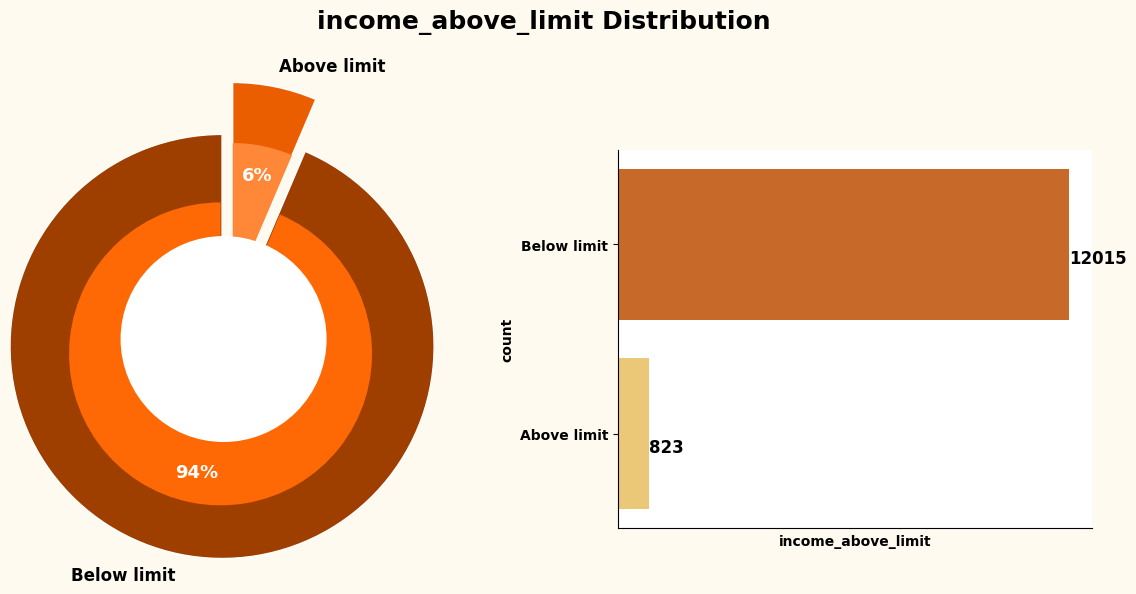

In [16]:
plot_count(df, 'income_above_limit', 'income_above_limit Distribution')

* The dataset is unbalanced, as the dependent feature 'income_above_limit' contains 93.8% values have income less than limit and 6.2% values have income more than limit
* So many null values are also present which is not great

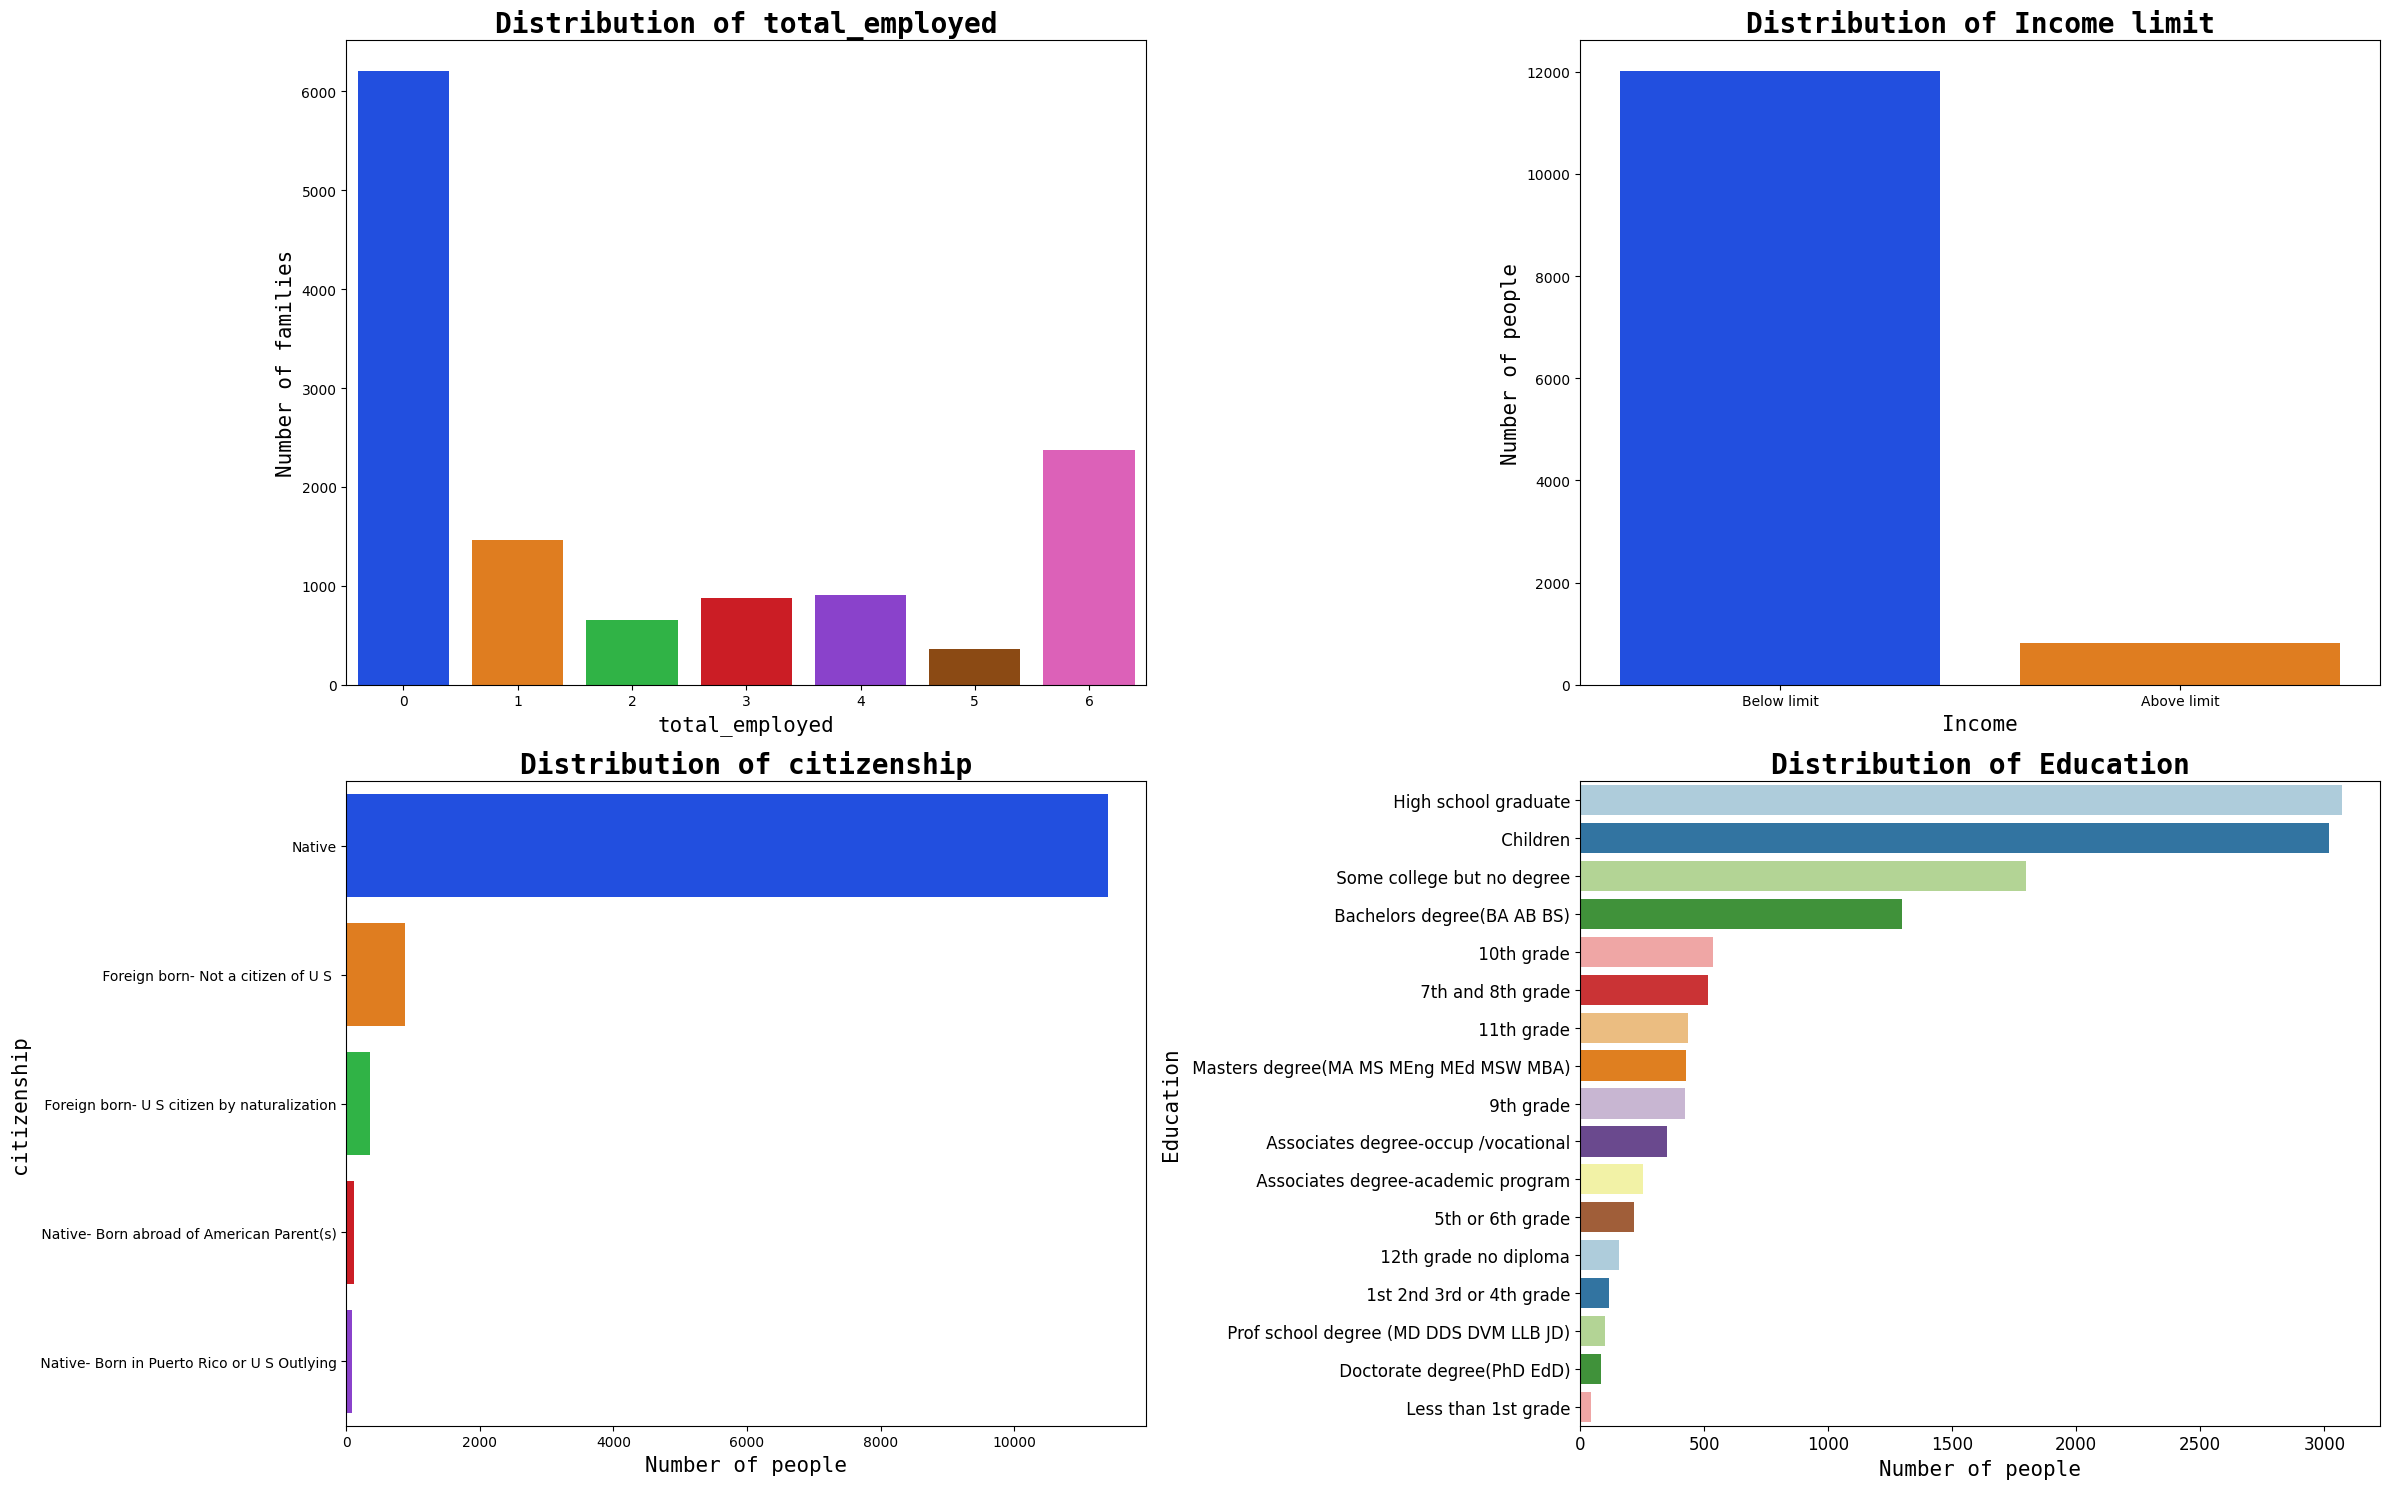

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(24, 15))

# Distribution of total_employed
total_employed = df['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs[0,0])
axs[0,0].set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,0].set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,0].tick_params(labelsize=10)

# Distribution of Income limit
income = df['income_above_limit'].value_counts()
sns.barplot(x=income.index, y=income.values, palette='bright', ax=axs[0,1])
axs[0,1].set_title('Distribution of Income limit', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[0,1].set_xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[0,1].tick_params(labelsize=10)

citizenship = df['citizenship'].value_counts()
sns.barplot(y=citizenship.index,x=citizenship.values,palette='bright',ax=axs[1,0])
axs[1,0].set_title('Distribution of citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,0].set_ylabel('citizenship', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,0].tick_params(labelsize=10)

edu = df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired',ax=axs[1,1])
axs[1,1].set_title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs[1,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].set_ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs[1,1].tick_params(labelsize=12)


plt.tight_layout()


plt.show()

In [18]:
edu_df = df.copy(deep=True)

edu_df['education'].value_counts()

 High school graduate                      3071
 Children                                  3017
 Some college but no degree                1798
 Bachelors degree(BA AB BS)                1297
 10th grade                                 534
 7th and 8th grade                          517
 11th grade                                 433
 Masters degree(MA MS MEng MEd MSW MBA)     428
 9th grade                                  424
 Associates degree-occup /vocational        352
 Associates degree-academic program         253
 5th or 6th grade                           216
 12th grade no diploma                      158
 1st 2nd 3rd or 4th grade                   115
 Prof school degree (MD DDS DVM LLB JD)      99
 Doctorate degree(PhD EdD)                   84
 Less than 1st grade                         43
Name: education, dtype: int64

In [19]:
edu_df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

<Axes: ylabel='None'>

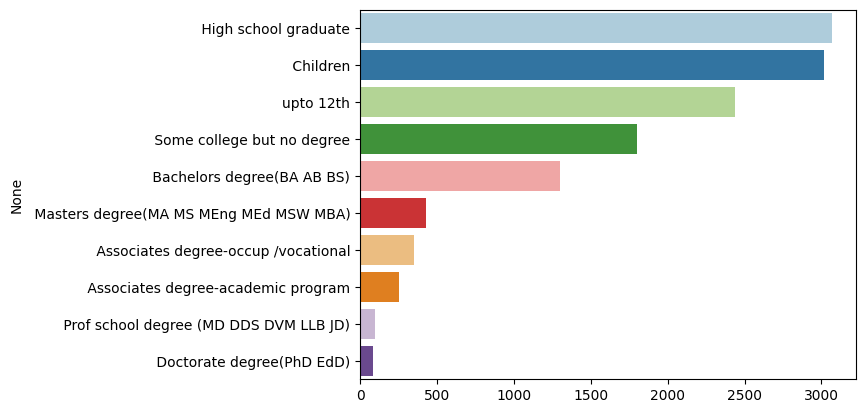

In [20]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

edu = edu_df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

In [21]:
print('Income below limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
print('Income above limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Above limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')

Income below limit for people upto 12th: 99.09836065573771 %
Income above limit for people upto 12th: 0.9016393442622952 %


* People with education upto only 12th are under the income limit with a few exceptions
* There are so many childrens in the data
* Also after converting all the grades upto 12th we find that also forms a major proportion if combined

In [22]:
print('Native citizenship having income below limit:',len(df.loc[(df['citizenship']=='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']=='Native')]) * 100, '%')
print('Non-Native citizenship having income below limit:',len(df.loc[(df['citizenship']!='Native') & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['citizenship']!='Native')]) * 100, '%')

Native citizenship having income below limit: 93.40813464235625 %
Non-Native citizenship having income below limit: 94.9685534591195 %


In [23]:
print('Employed more than 1 but income is below limit:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(df.loc[(df['total_employed']==0) & (df['income_above_limit']=='Below limit')])/len(df.loc[(edu_df['total_employed']==0)]) * 100, '%')

Employed more than 1 but income is below limit: 87.62567672080434 %
Employed only 1 but income is below limit: 90.15047879616964 %
None employed and income is below limit: 99.35535858178888 %


In [24]:
print('People above income limit with more than 1 employed:',len(df.loc[(df['total_employed']>1) & (df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(df.loc[(df['total_employed']==1) & (df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed: 639
People above income limit with only 1 employed: 144


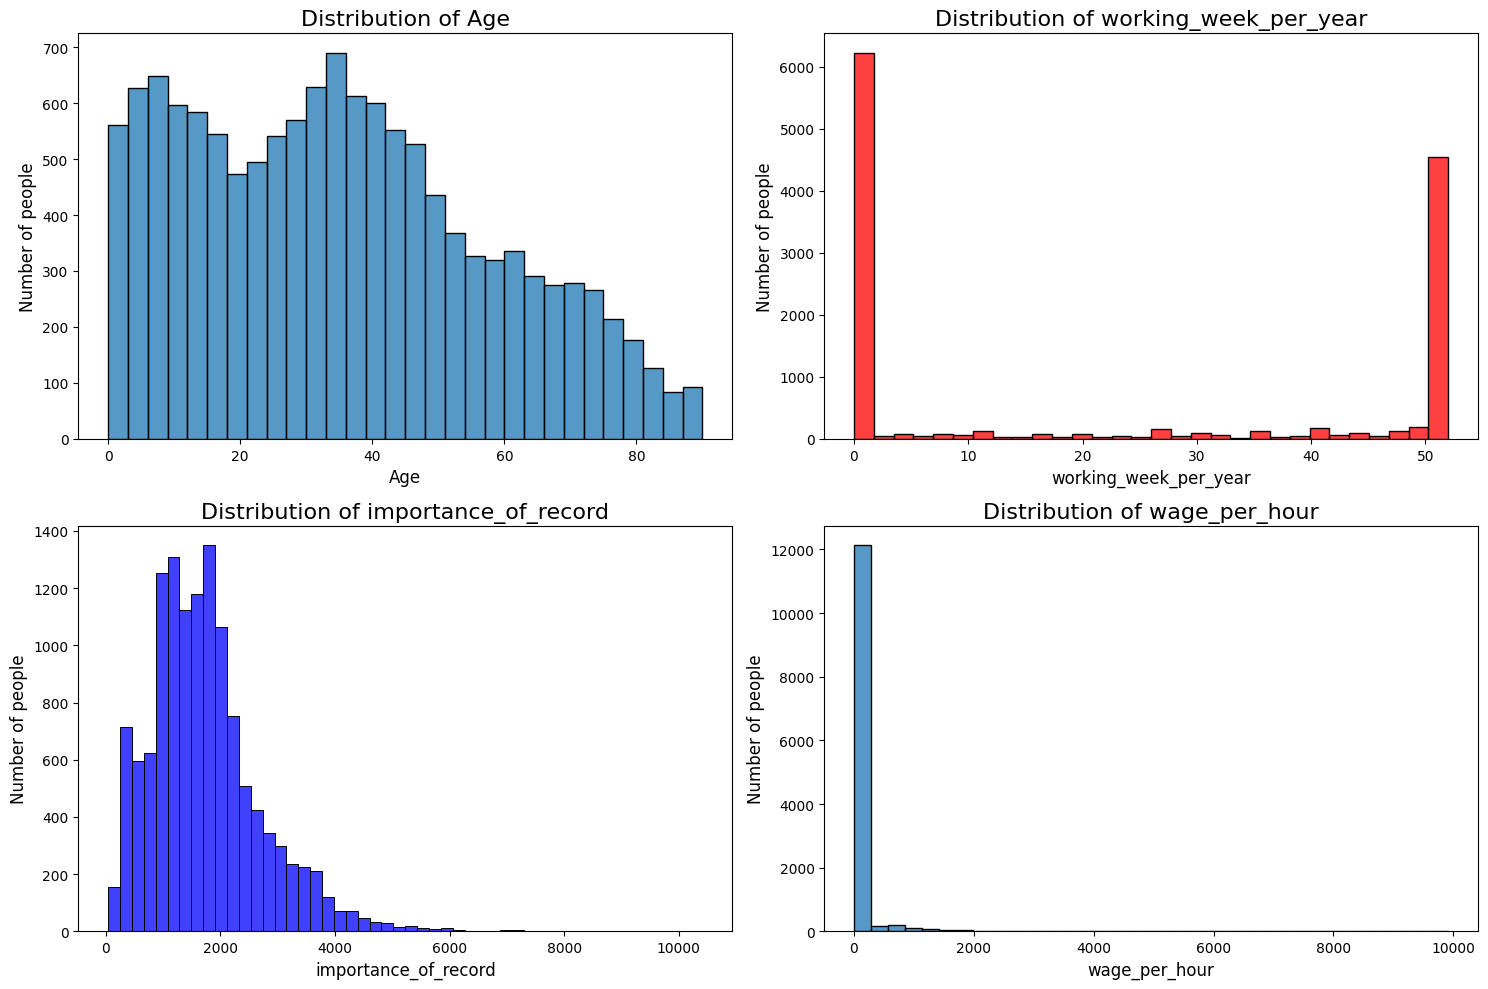

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distribution of Age
sns.histplot(df['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plotting the distribution of working_week_per_year
sns.histplot(df['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plotting the distribution of importance_of_record
sns.histplot(df['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plotting the distribution of wage_per_hour
sns.histplot(df['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

plt.tight_layout()
plt.show()

* The working week per hour again shows that as there are so many children the ditribution has a high peak at 0 working hours
* There are so many people with low pages i.e. less than 2000

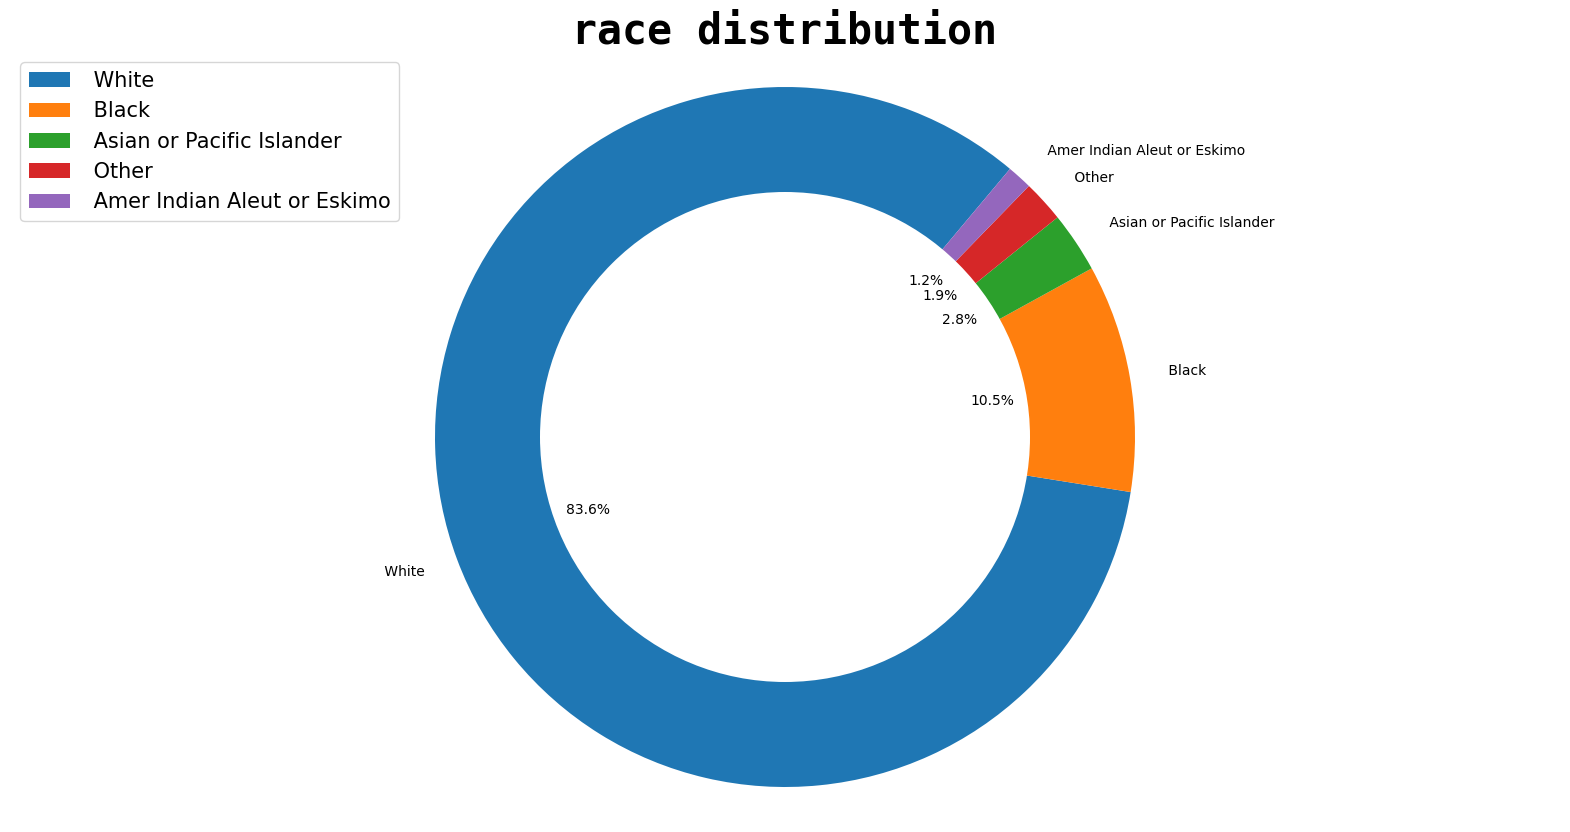

In [26]:
race = df['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [27]:
df['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

In [28]:
print('Whites having income below limit:',len(df.loc[(df['race']==' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']==' White')]) * 100, '%')
print('Non-Whites having income below limit:',len(df.loc[(df['race']!=' White') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['race']!=' White')]) * 100, '%')

Whites having income below limit: 92.93766887170409 %
Non-Whites having income below limit: 96.86609686609687 %


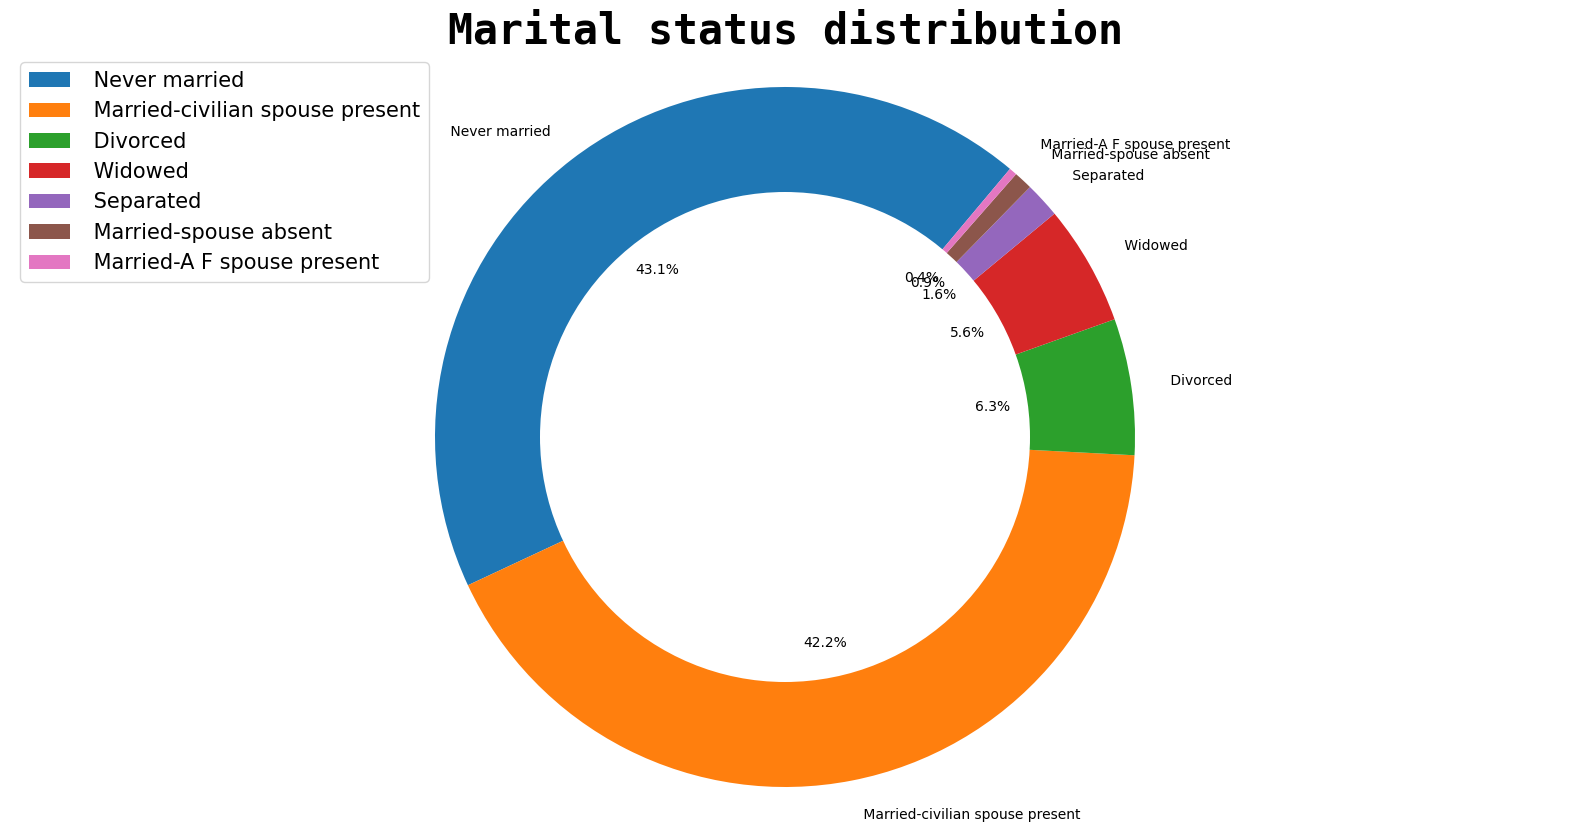

In [29]:
# Creating a donut chart for 'Marital status'
marital = df['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

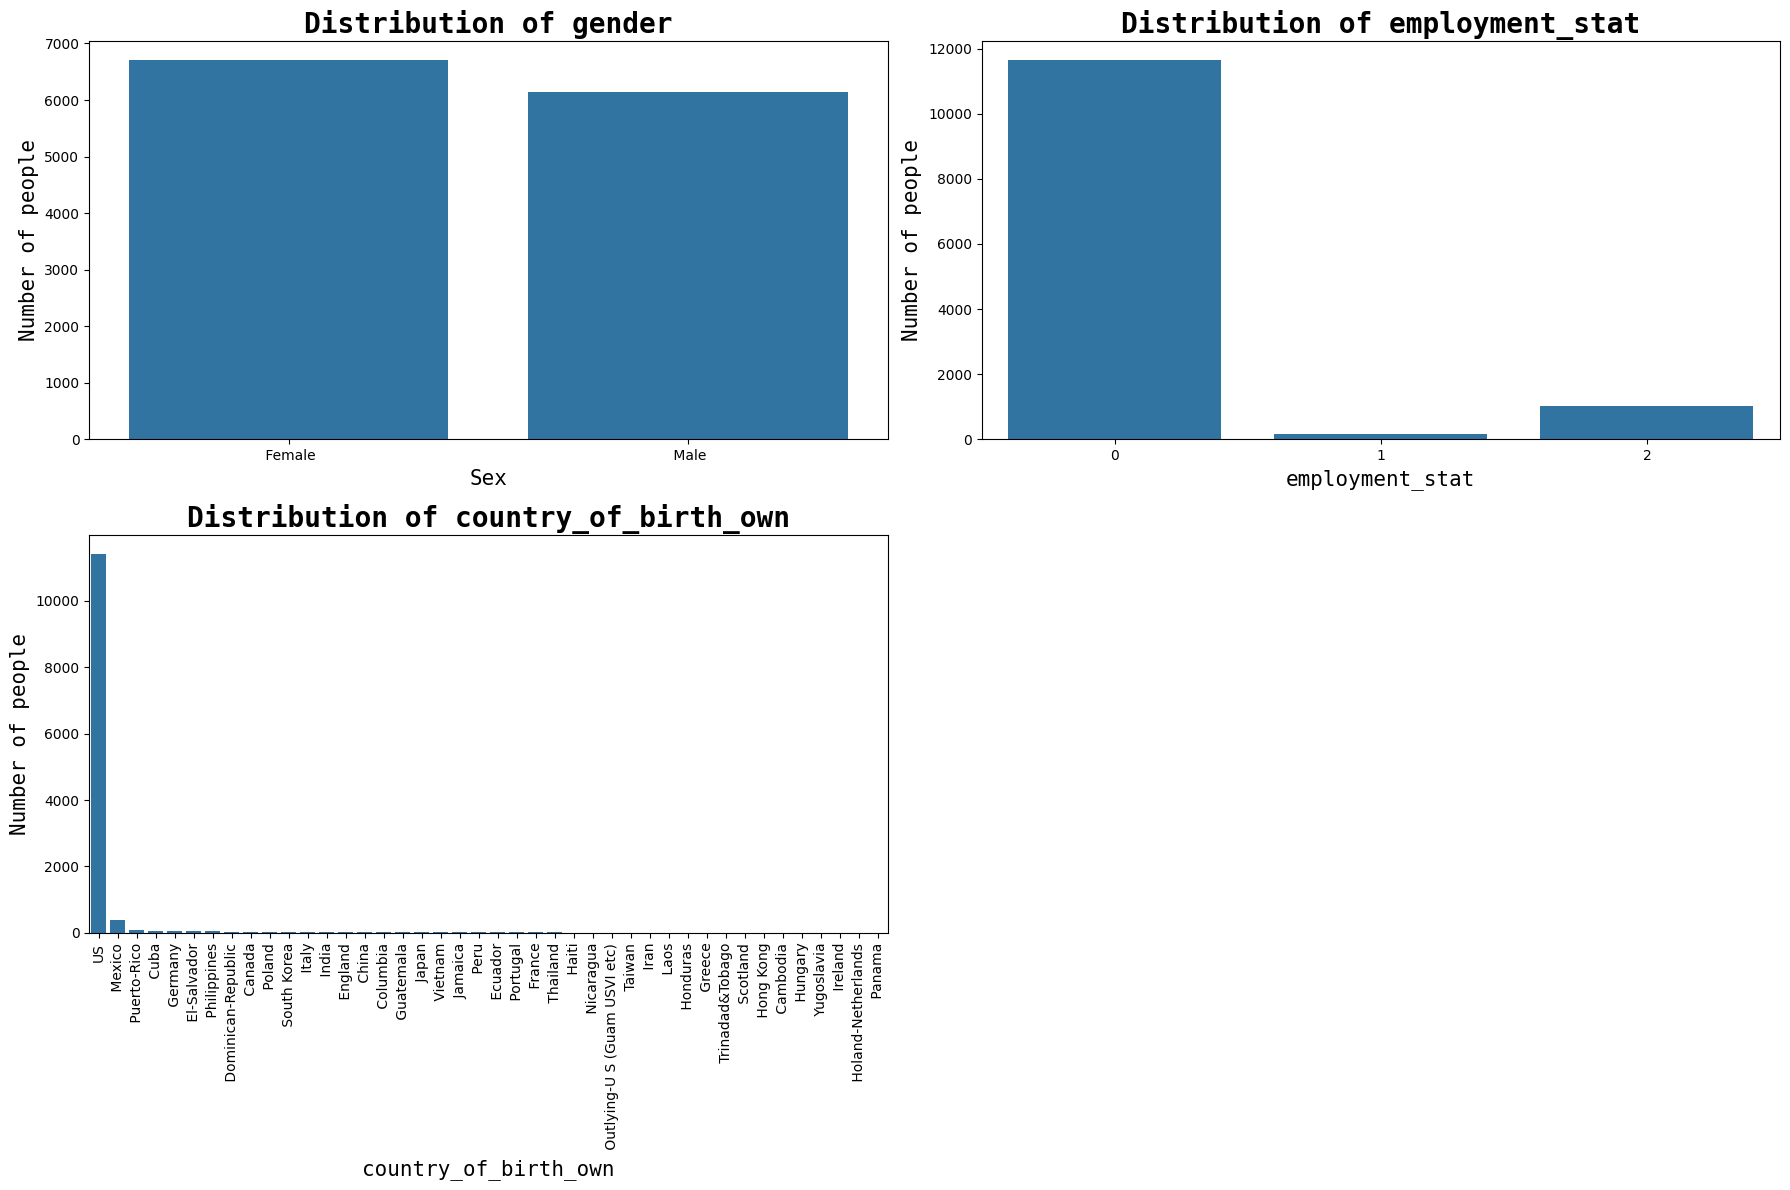

In [30]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=axes[0,0])
axes[0,0].set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_stat = df['employment_stat'].value_counts()
sns.barplot(x=employment_stat.index, y=employment_stat.values, ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
country_of_birth_own = df['country_of_birth_own'].value_counts()
sns.barplot(x=country_of_birth_own.index, y=country_of_birth_own.values, ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [31]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')])/len(df.loc[(df['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.71642764015645 %
Females with income below limit: 97.12069222736088 %


In [32]:
print('Males with income below limit:',len(df.loc[(df['gender']==' Male') & (df['income_above_limit']=='Below limit')]))
print('Females with income below limit:',len(df.loc[(df['gender']!=' Male') & (df['income_above_limit']=='Below limit')]))

Males with income below limit: 5505
Females with income below limit: 6510


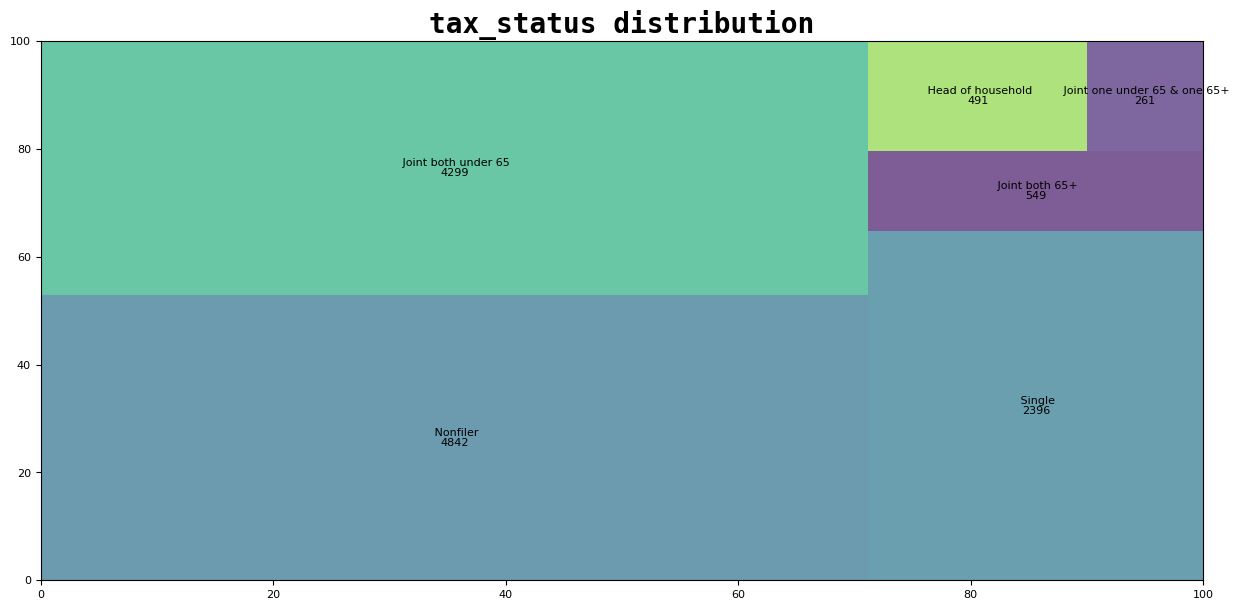

In [33]:
tax_status = df['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

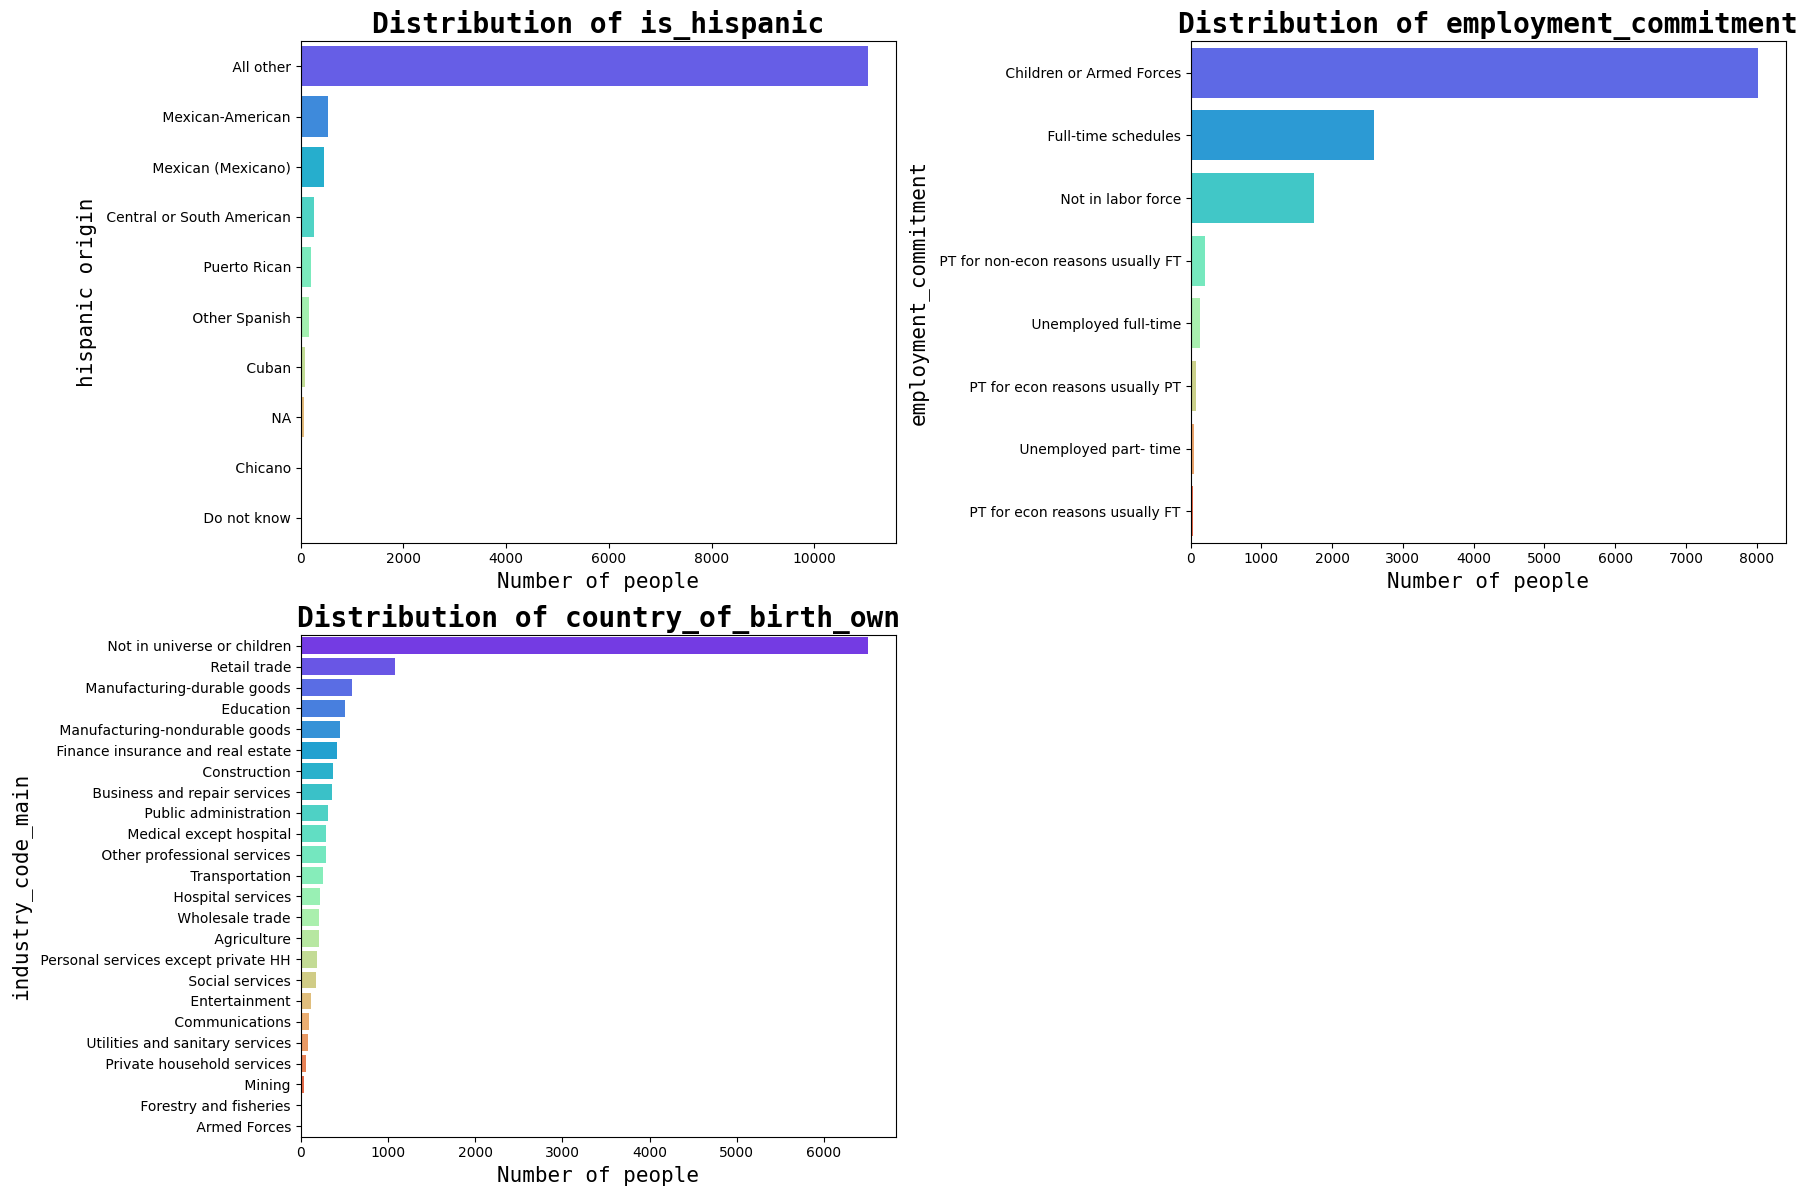

In [34]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
is_hispanic = df['is_hispanic'].value_counts()
sns.barplot(x=is_hispanic.values, y=is_hispanic.index, palette='rainbow', ax=axes[0,0])
axes[0,0].set_title('Distribution of is_hispanic', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('hispanic origin', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_commitment = df['employment_commitment'].value_counts()
sns.barplot(x=employment_commitment.values, y=employment_commitment.index, palette='rainbow', ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
industry_code_main = df['industry_code_main'].value_counts()
sns.barplot(x=industry_code_main.values, y=industry_code_main.index, palette='rainbow', ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('industry_code_main', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

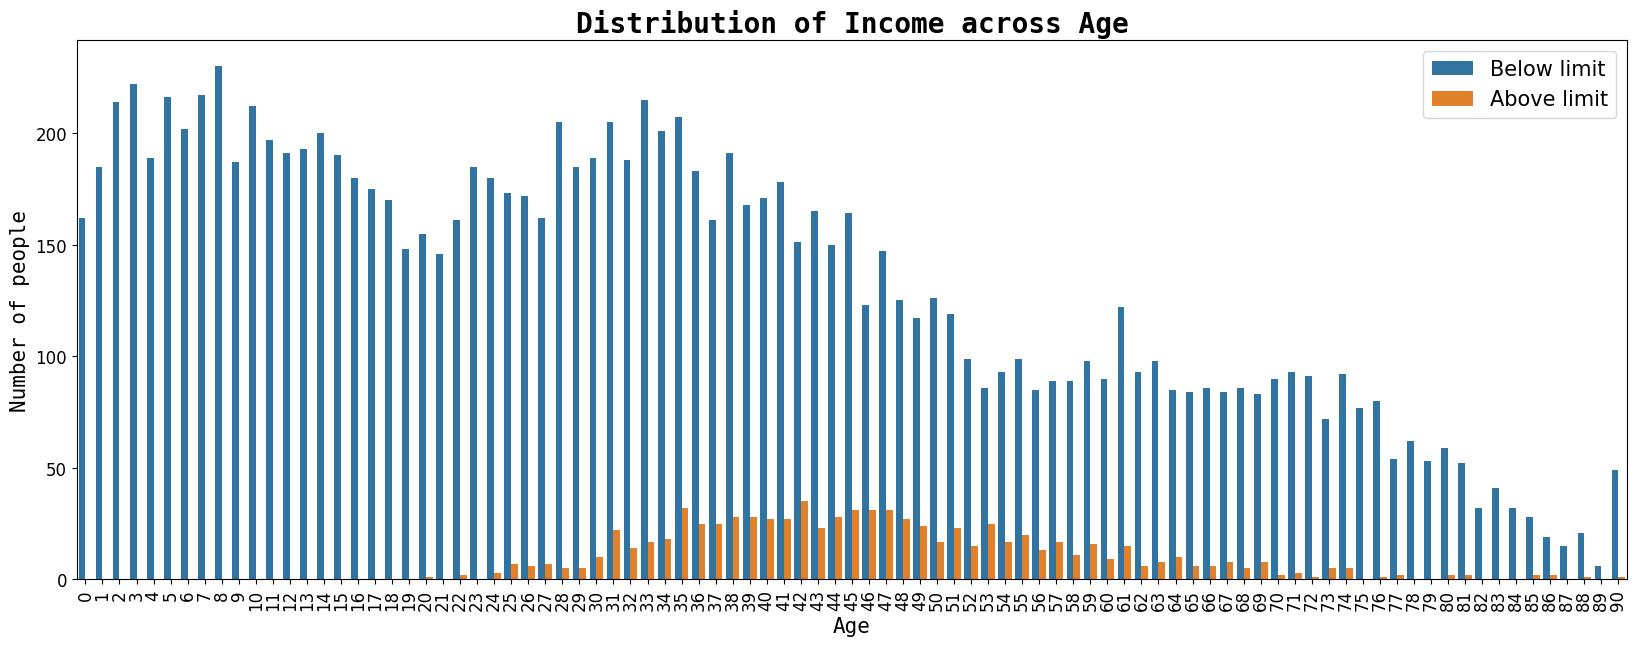

In [35]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

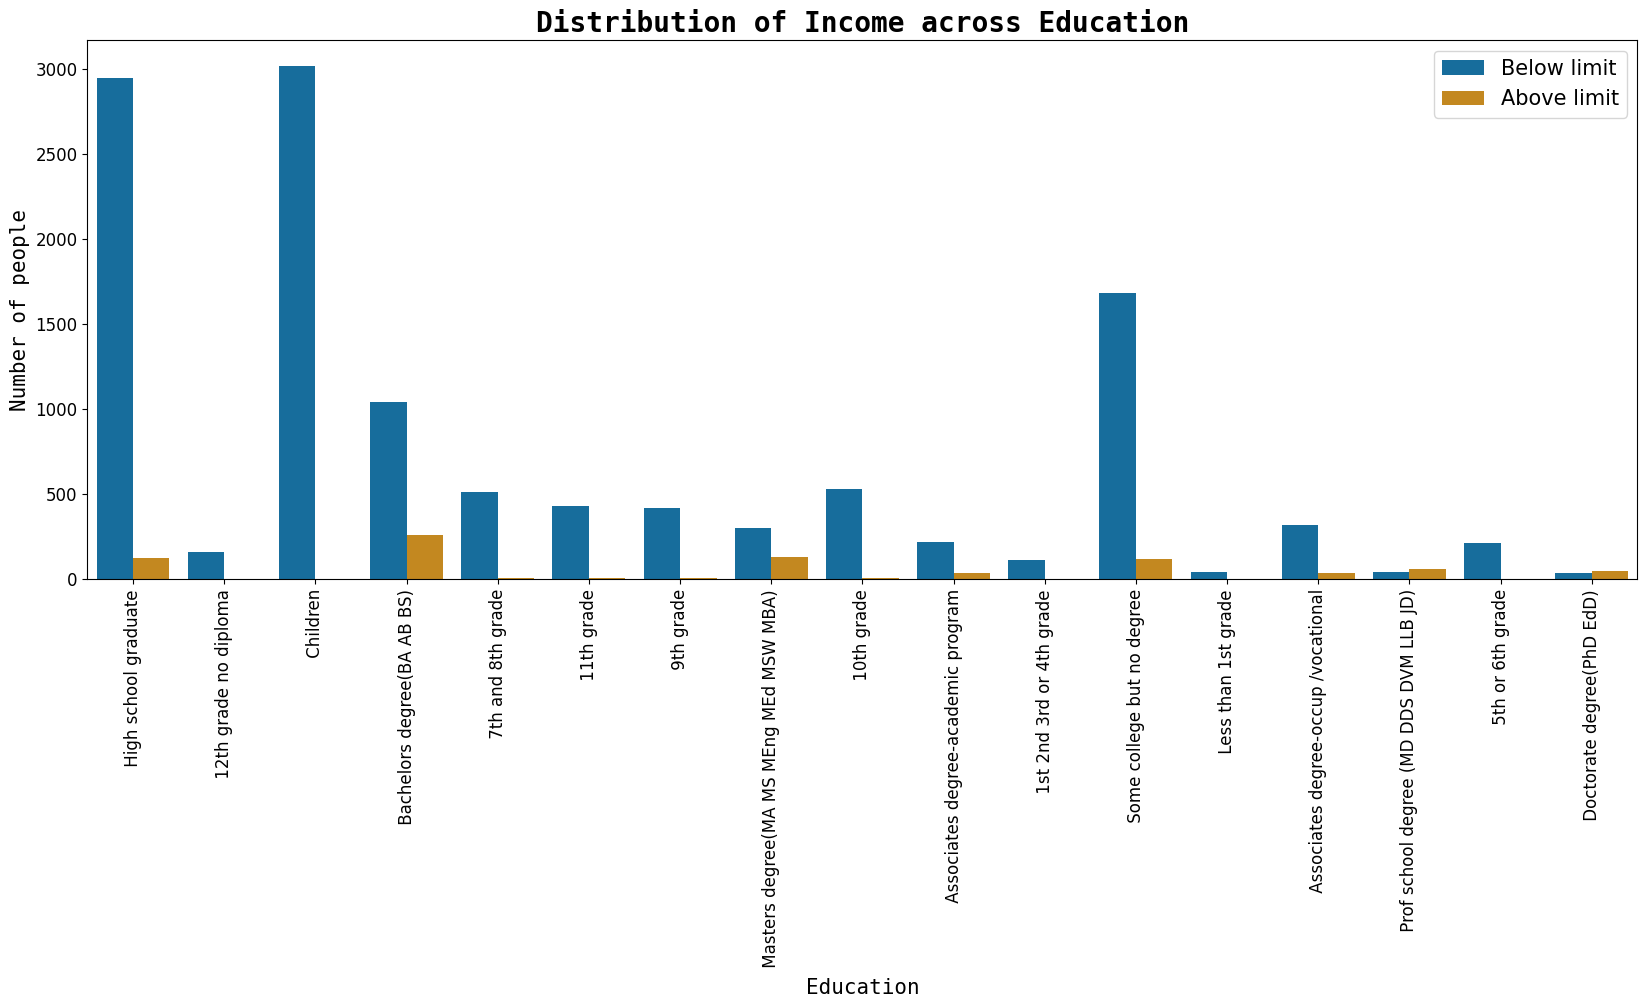

In [36]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

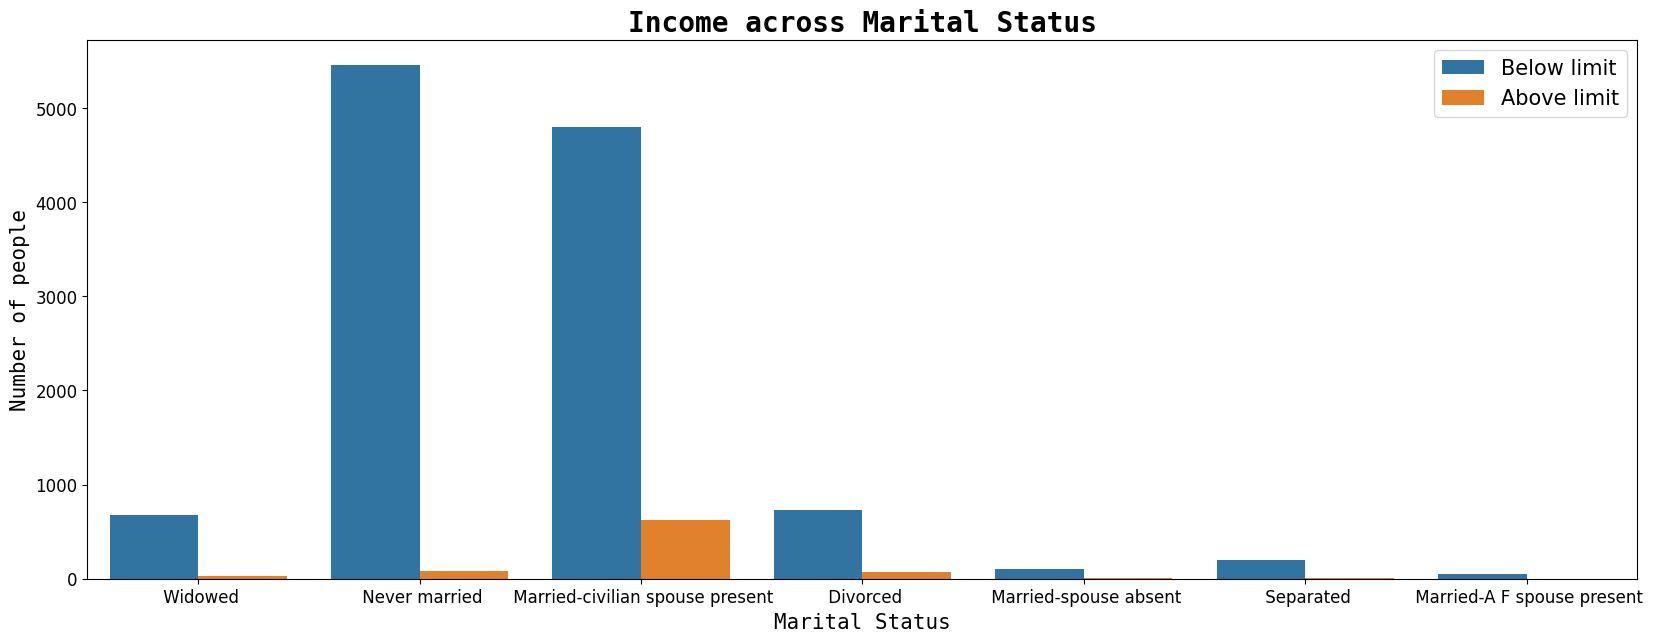

In [37]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital_status'], hue=df['income_above_limit'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

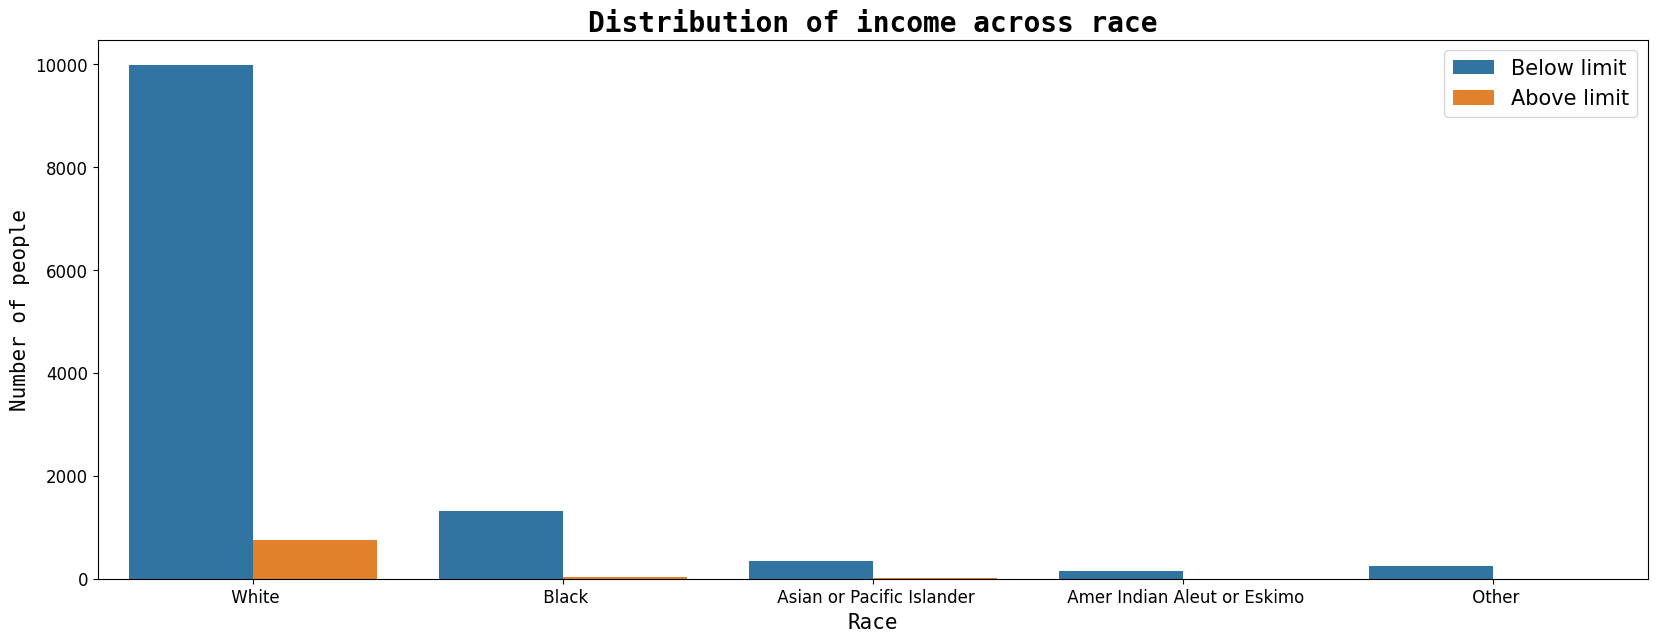

In [38]:
# Creating a countplot of income across race
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income_above_limit'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

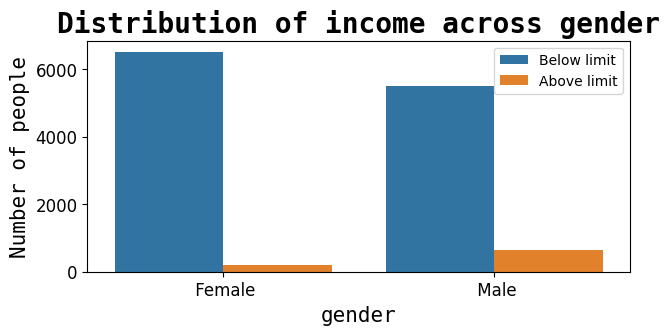

In [39]:
# Creating a countplot of income across sex
plt.figure(figsize=(7, 3))
sns.countplot(x=df['gender'], hue=df['income_above_limit'])
plt.title('Distribution of income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

In [40]:
df.replace({'Below limit':0,'Above limit':1},inplace=True)

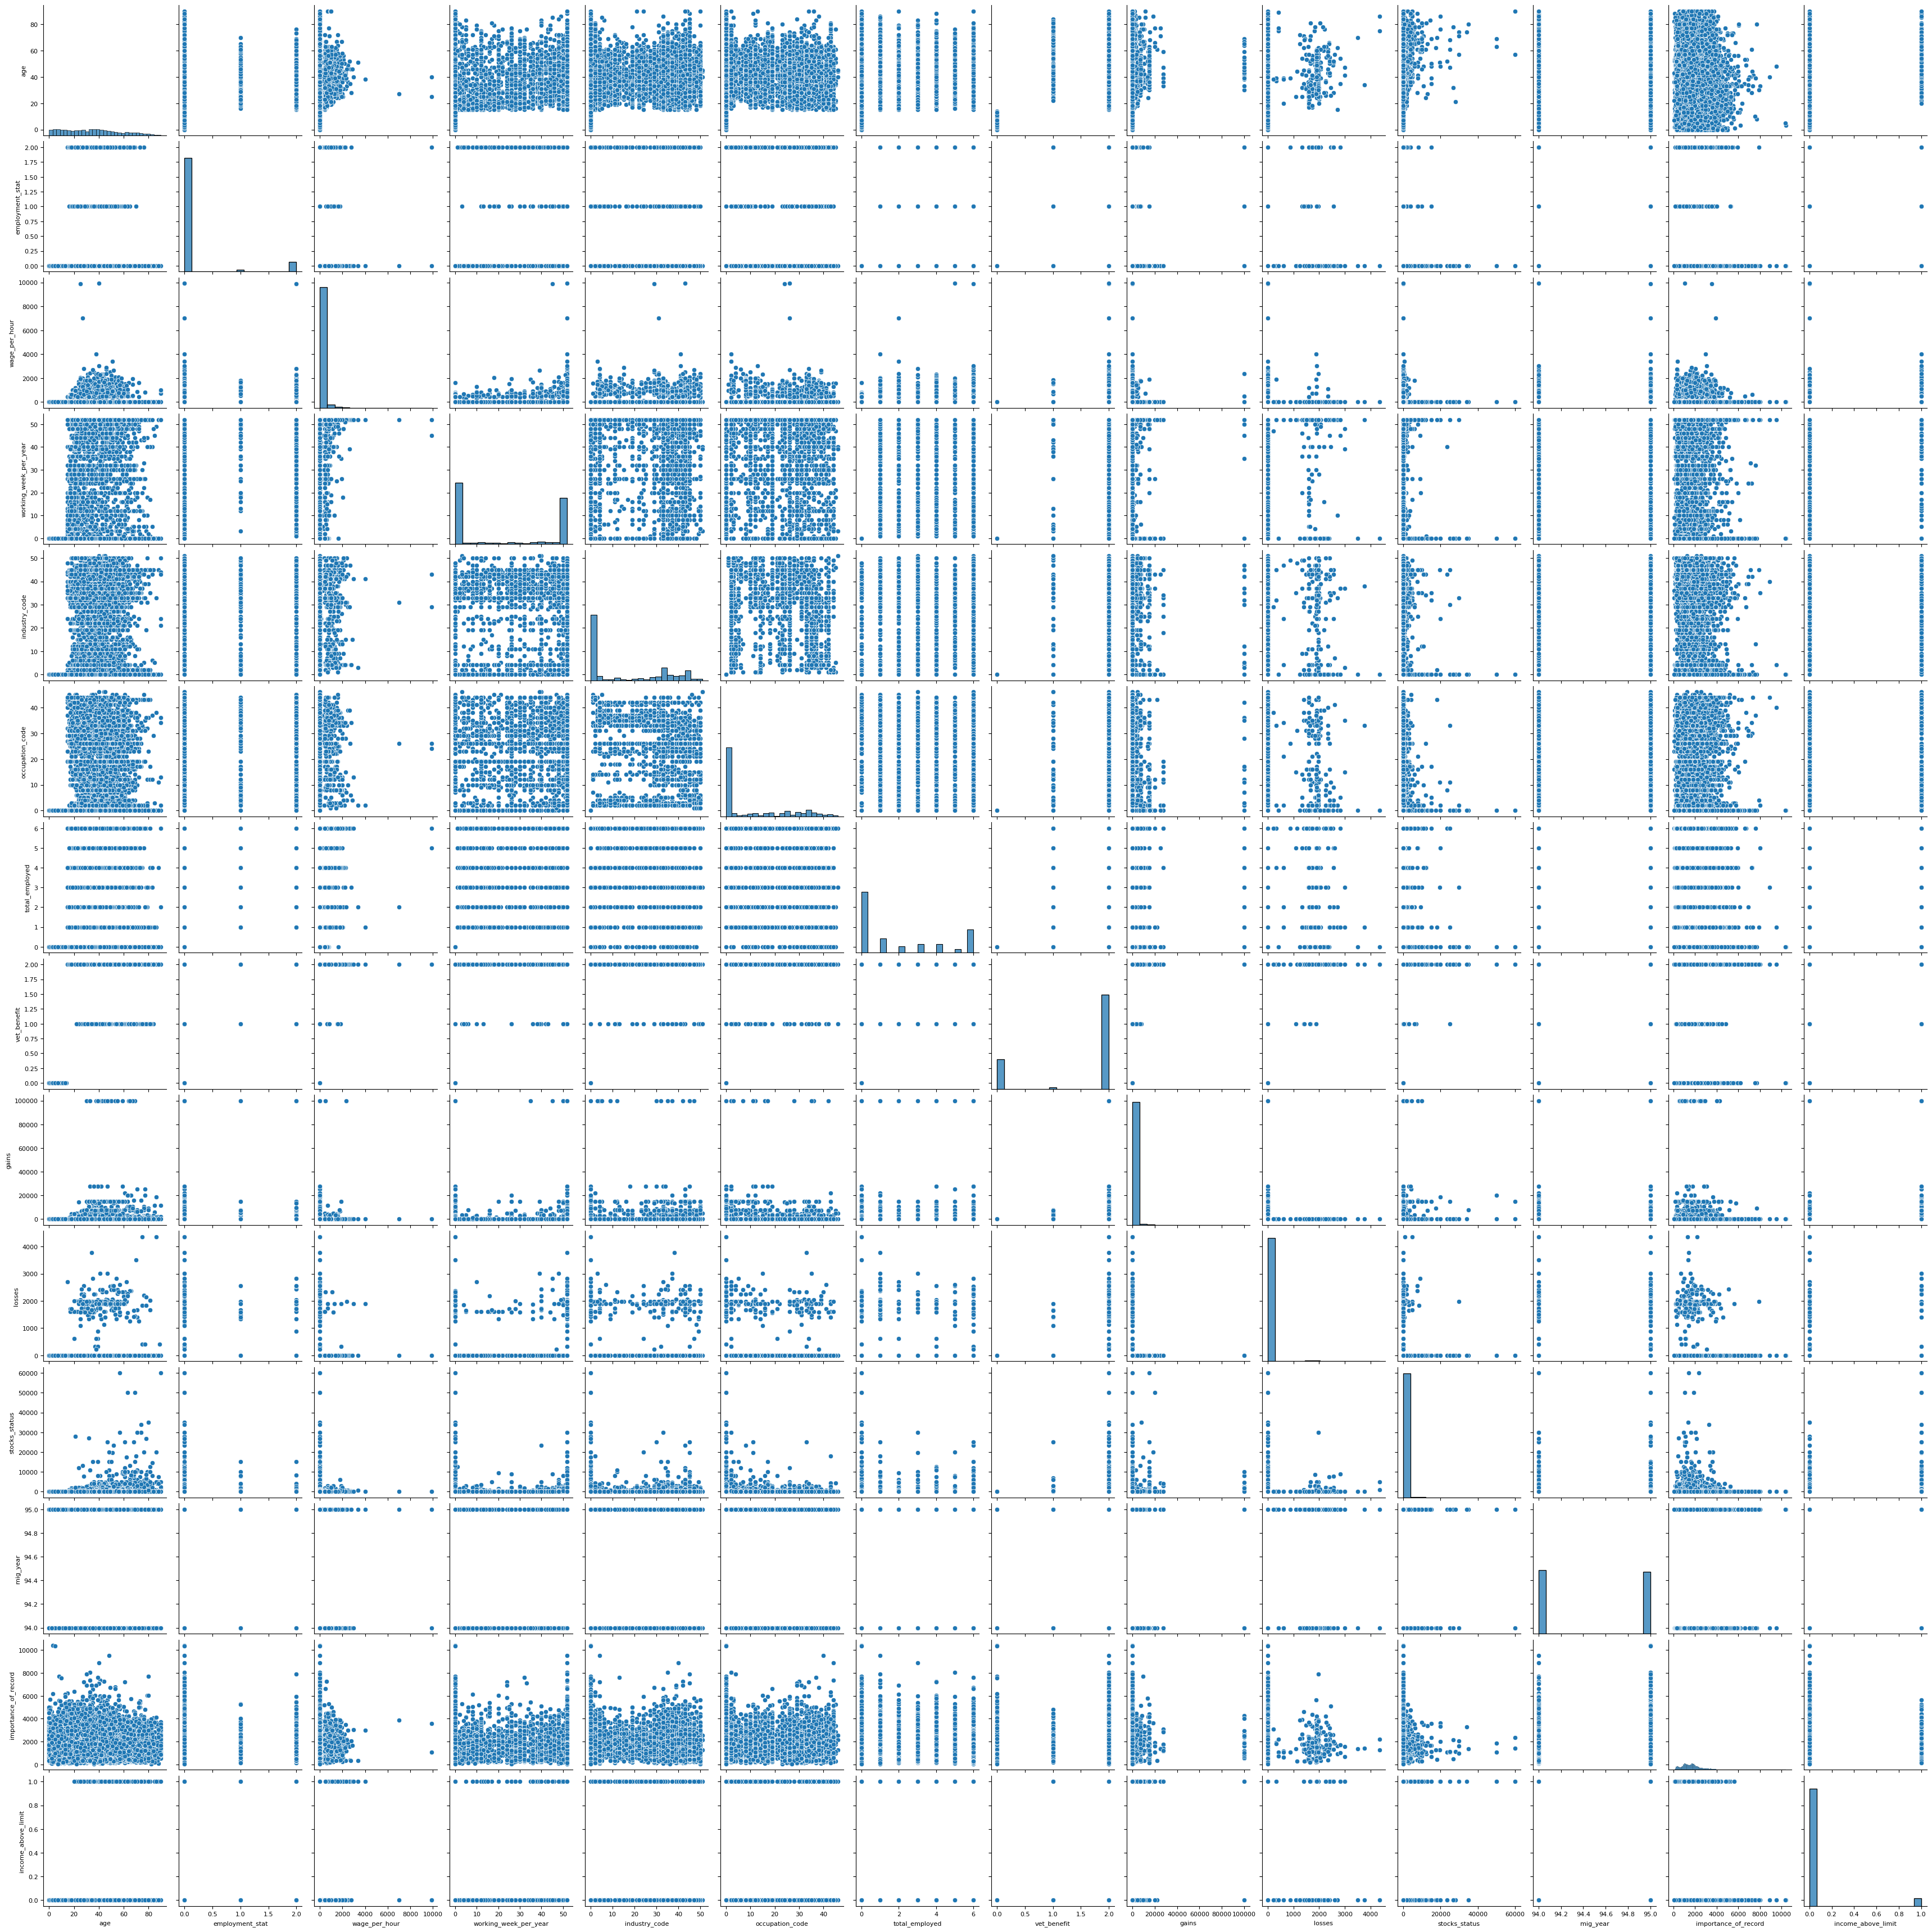

In [41]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

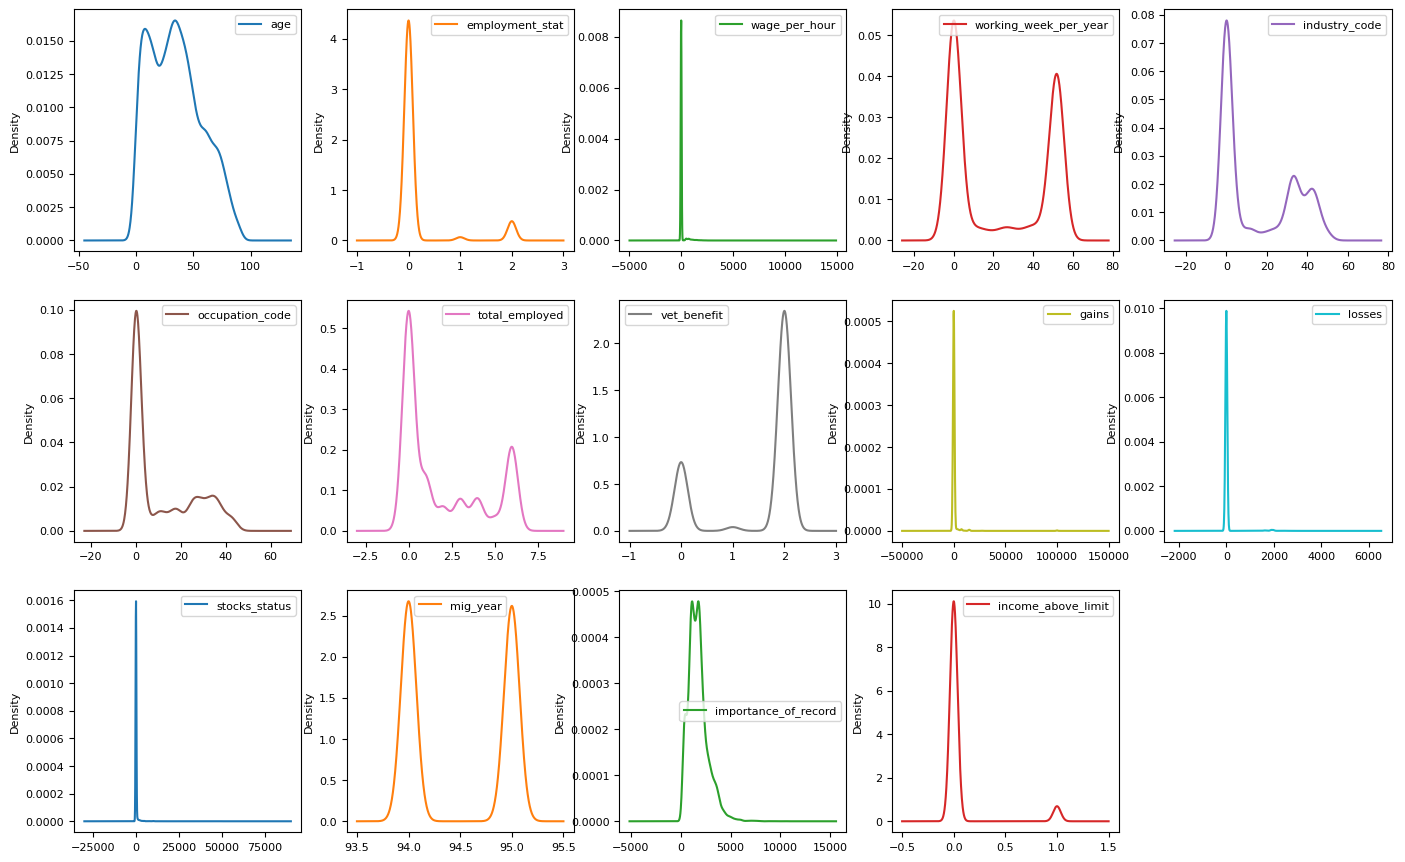

In [42]:
df.plot(kind="density",
                subplots=True,
                layout = (6,5),
                figsize=(17,22),
                sharex=False,
                sharey=False);

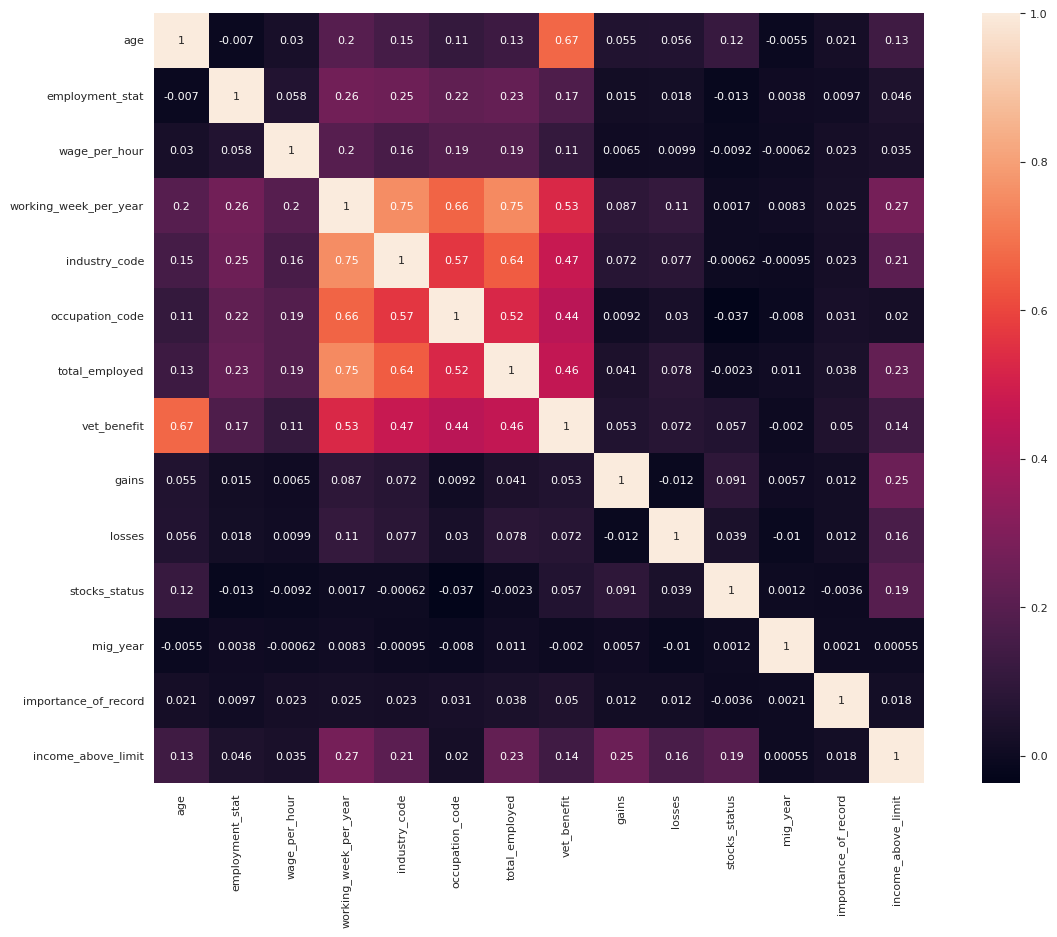

In [43]:
corr = df.corr(method='pearson')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True,annot=True)
plt.show()

#  Data Preprocessing

### <span style="font-family:cursive;text-align:center">Null values handling</span>

In [44]:
# Checking null values
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.42 %
education_institute               93.56 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.95 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.83 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.64 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                  0.01 %
under_18_family                   72.56 %
veterans_admin_questionnaire      

In [45]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in df.columns:
    if df[cols].isna().sum()/df.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [46]:
print(f'We will drop the following columns from data: ')
print(nan_cols_drop)

We will drop the following columns from data: 
['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [47]:
print('The shape of data before dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

df = df.drop(nan_cols_drop,axis=1)

print('---------------------------------------------------------------------------------------------------\n')
print('The shape of data after dropping columns with high proportion of NaN values is - ')
print(f'The shape of data is {df.shape}')

The shape of data before dropping columns with high proportion of NaN values is - 
The shape of data is (12839, 43)
---------------------------------------------------------------------------------------------------

The shape of data after dropping columns with high proportion of NaN values is - 
The shape of data is (12839, 29)


In [48]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                          0.0 %
age                         0.0 %
gender                      0.0 %
education                   0.0 %
marital_status              0.0 %
race                        0.0 %
is_hispanic                 0.0 %
employment_commitment       0.0 %
employment_stat             0.0 %
wage_per_hour               0.0 %
working_week_per_year       0.0 %
industry_code               0.0 %
industry_code_main          0.0 %
occupation_code             0.0 %
total_employed              0.0 %
household_stat              0.0 %
household_summary          0.01 %
vet_benefit                0.01 %
tax_status                 0.01 %
gains                      0.01 %
losses                     0.01 %
stocks_status              0.01 %
citizenship                0.01 %
mig_year                   0.01 %
country_of_birth_own       1.59 %
country_of_birth_father    3.34 %
country_of_birth_mother     3.0 %
importance_of_record       0.01 %
income_above_limit         0.01 %
dtype: object

In [49]:
df = df.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1)

In [50]:
round((df.isna().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

ID                        0.0 %
age                       0.0 %
gender                    0.0 %
education                 0.0 %
marital_status            0.0 %
race                      0.0 %
is_hispanic               0.0 %
employment_commitment     0.0 %
employment_stat           0.0 %
wage_per_hour             0.0 %
working_week_per_year     0.0 %
industry_code             0.0 %
industry_code_main        0.0 %
occupation_code           0.0 %
total_employed            0.0 %
household_stat            0.0 %
household_summary        0.01 %
vet_benefit              0.01 %
tax_status               0.01 %
gains                    0.01 %
losses                   0.01 %
stocks_status            0.01 %
citizenship              0.01 %
mig_year                 0.01 %
importance_of_record     0.01 %
income_above_limit       0.01 %
dtype: object

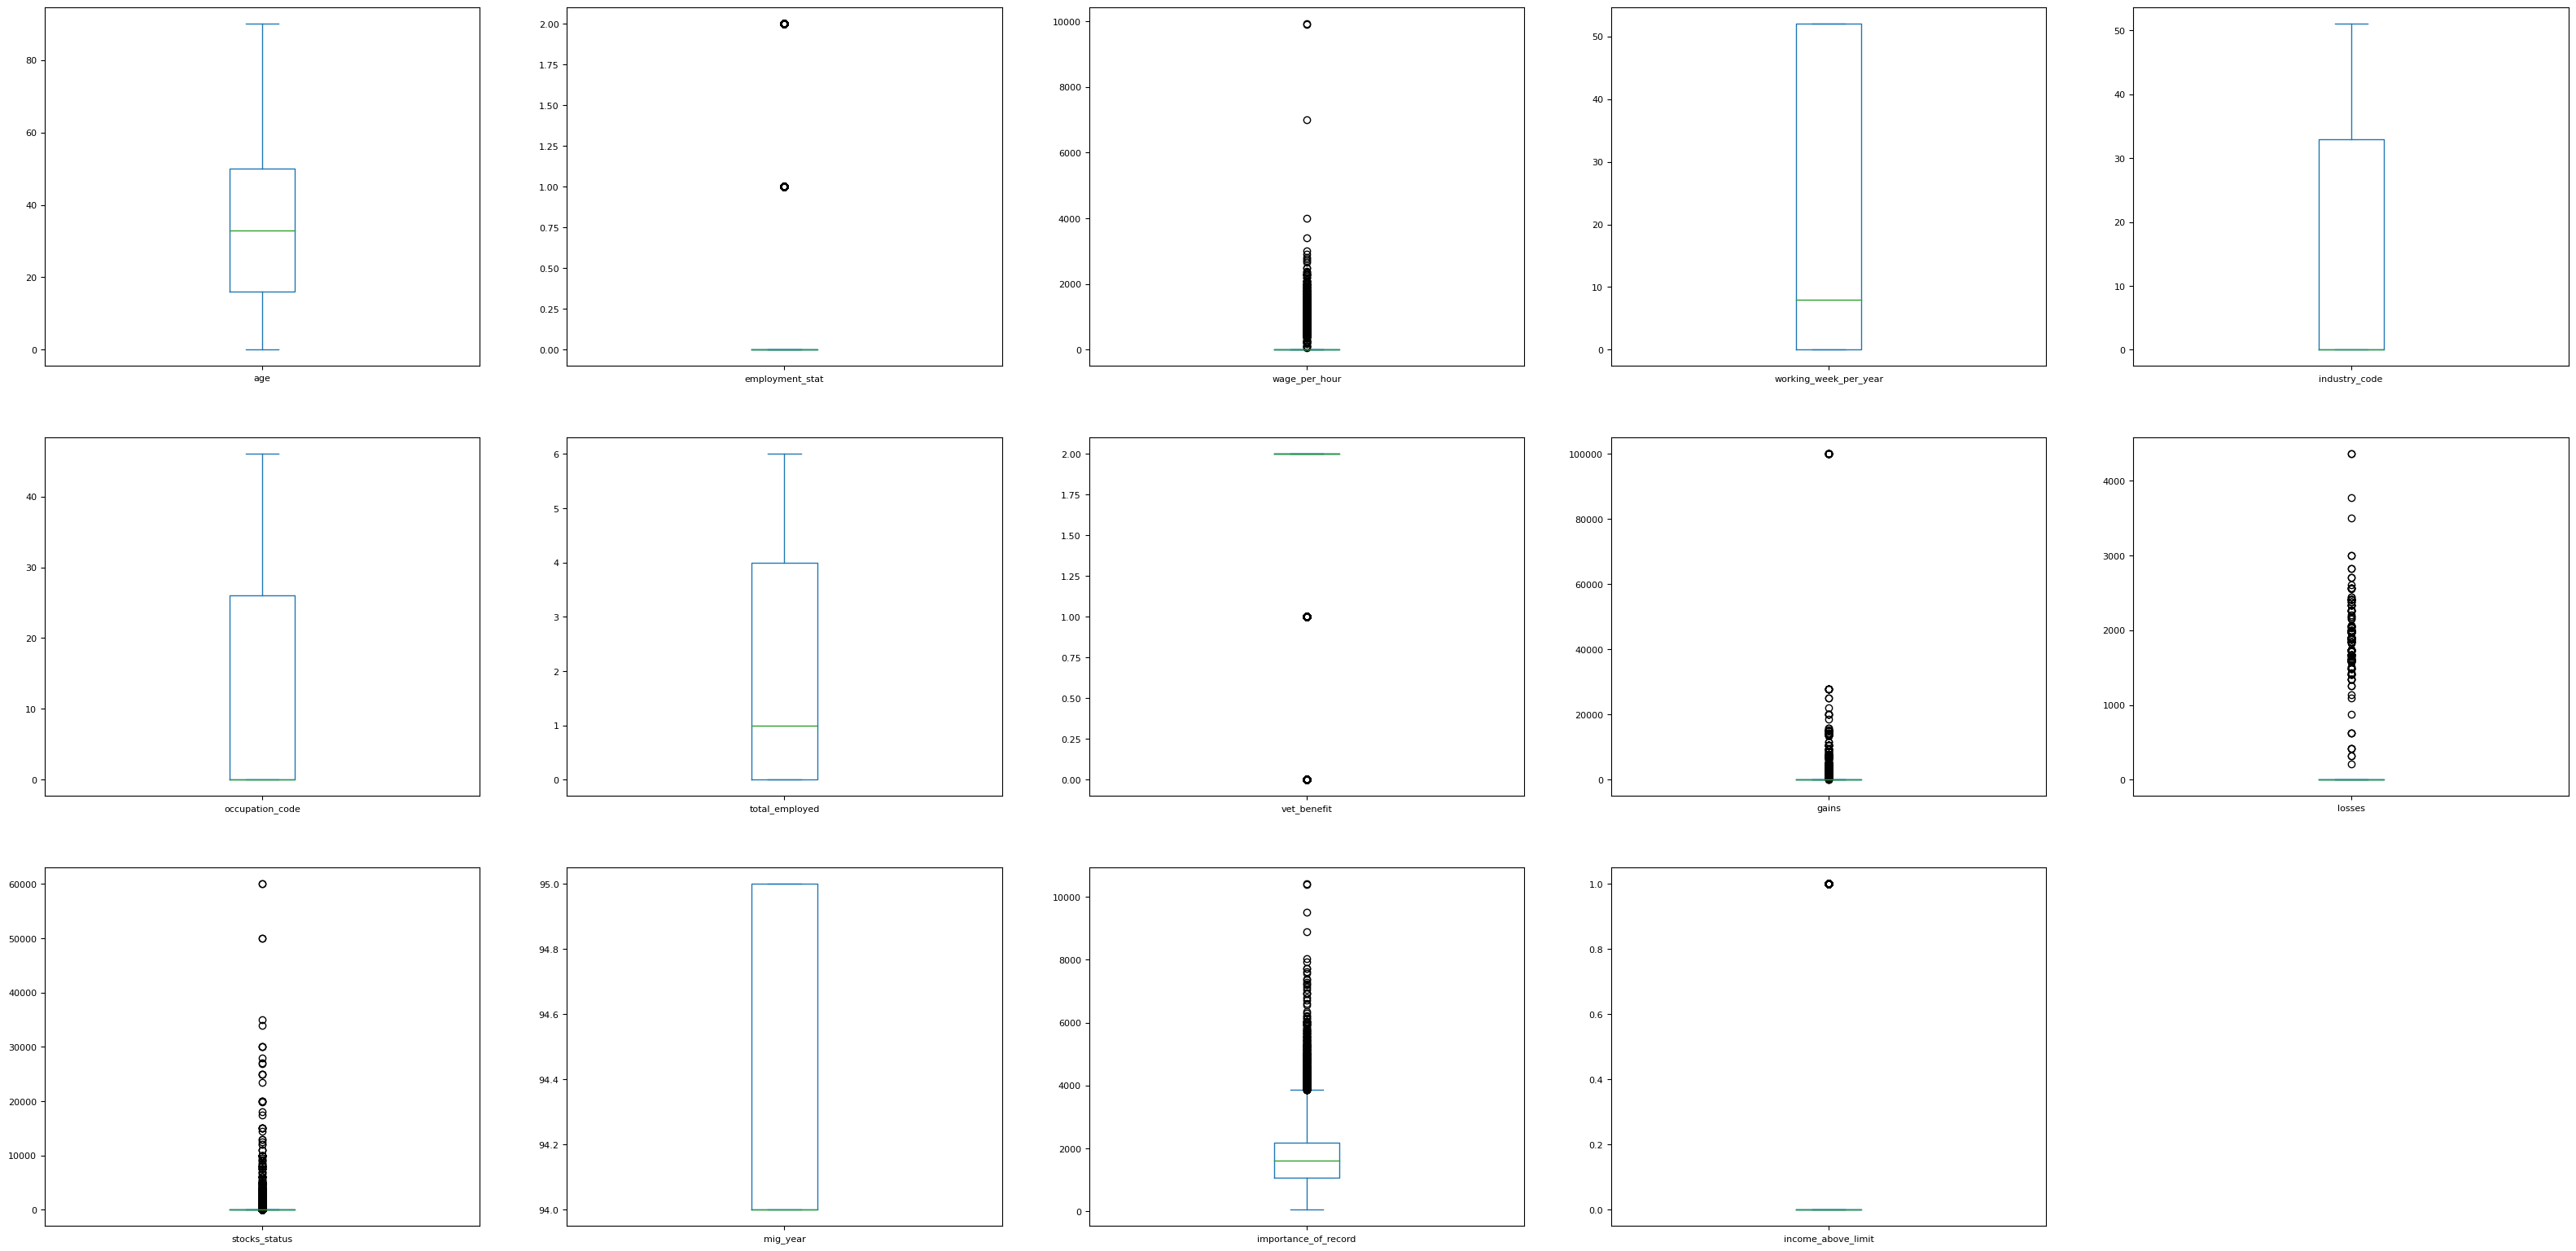

In [51]:
df.plot(kind="box",
                vert=True,
                subplots=True,
                layout = (6,5),
                figsize=(40,40),
                sharex=False,
                sharey=False);

In [52]:
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:

    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)

    outs = []

    for j in df[i]:
        if j<lower_bridge:
            outs.append(j)

    for k in df[i]:
        if k>upper_bridge:
            outs.append(k)

    print(f'The percentage of outliers in {i}:',(len(outs)/len(df)*100),'%')

The percentage of outliers in wage_per_hour: 5.592335851701846 %
The percentage of outliers in gains: 3.6918763143547007 %
The percentage of outliers in losses: 1.8225718513902953 %
The percentage of outliers in stocks_status: 10.117610405794844 %
The percentage of outliers in importance_of_record: 3.2712828101877096 %


In [53]:
df.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0         Not in labor force                0              0   
1   Children or Armed Forces                0              0   
2   Children or Armed Forces                0            500   
3   Children or Armed Forces                0              0   
4         Not in labor force                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52              0   Not in universe or children   
1                      0              0   Not in universe or children   
2                     15             41             Hospital services   
3                      0              0   Not in universe or children   
4                      0              0   Not in universe or children   

   occupation_code  total_employed                            household_stat  \
0                0               2                               Householder   
1                0               0                     Nonfamily householder   
2               26               4   Child 18+ never marr Not in a subfamily   
3                0               0     Child <18 never marr not in subfamily   
4                0               0                     Spouse of householder   

               household_summary  vet_benefit          tax_status  gains  \
0                    Householder          2.0   Head of household    0.0   
1                    Householder          2.0              Single    0.0   
2              Child 18 or older          2.0              Single    0.0   
3   Child under 18 never married          0.0            Nonfiler    0.0   
4          Spouse of householder          2.0      Joint both 65+    0.0   

   losses  stocks_status citizenship  mig_year  importance_of_record  \
0     0.0          292.0      Native      95.0               1779.74   
1     0.0            0.0      Native      94.0               2366.75   
2     0.0            0.0      Native      94.0               1693.42   
3     0.0            0.0      Native      94.0               1380.27   
4     0.0            0.0      Native      95.0               1580.79   

   income_above_limit  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [54]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,df[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [55]:
df.drop(columns=['household_stat'],axis=1,inplace=True)

In [56]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [57]:
print('The class Imbalance in the data is given below')
print(df['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{df['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
0.0    12015
1.0      823
Name: income_above_limit, dtype: int64 

The class imbalance in terms of percentage is given below 
0.0    93.589344
1.0     6.410656
Name: income_above_limit, dtype: float64


### <span style="font-family:cursive;text-align:center">Fixing imbalanced dataset using Oversampling</span>

In [58]:
x,y = df.drop(['ID','income_above_limit'],axis=1),df['income_above_limit']

In [64]:
y = y.dropna()
x = x.loc[y.index]


In [65]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [66]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
0.0    12015
1.0    12015
Name: income_above_limit, dtype: int64 

The class imbalance in terms of percentage is given below 
0.0    50.0
1.0    50.0
Name: income_above_limit, dtype: float64


###  Splitting the dataset

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [68]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (19224, 23)
X_test shape: (4806, 23)
Y_train shape: (19224,)
Y_test shape: (4806,)


In [69]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

age   gender                    education  \
0   59   Female   Bachelors degree(BA AB BS)   
1   74     Male   Some college but no degree   
2   50     Male                   11th grade   
3   18   Female                   10th grade   
4   31     Male   Bachelors degree(BA AB BS)   

                     marital_status    race                 is_hispanic  \
0   Married-civilian spouse present   White                   All other   
1                     Never married   White                   All other   
2   Married-civilian spouse present   White                   All other   
3                     Never married   White   Central or South American   
4   Married-civilian spouse present   White                   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0              0   
1         Not in labor force                0              0   
2   Children or Armed Forces                0              0   
3   Children or Armed Forces                0              0   
4        Full-time schedules                0              0   

   working_week_per_year  industry_code                  industry_code_main  \
0                     52             33                        Retail trade   
1                      0              0         Not in universe or children   
2                     52             29                      Transportation   
3                      0              0         Not in universe or children   
4                     52             35   Finance insurance and real estate   

   occupation_code  total_employed            household_summary  vet_benefit  \
0                3               1        Spouse of householder          2.0   
1                0               0                  Householder          2.0   
2               38               3                  Householder          2.0   
3                0               0   Nonrelative of householder          2.0   
4               17               2        Spouse of householder          2.0   

             tax_status  gains  losses  stocks_status  \
0   Joint both under 65    0.0     0.0          200.0   
1                Single    0.0     0.0        34000.0   
2   Joint both under 65    0.0     0.0            0.0   
3              Nonfiler    0.0     0.0            0.0   
4   Joint both under 65    0.0     0.0            0.0   

                            citizenship  mig_year  importance_of_record  
0                                Native      94.0               1263.98  
1                                Native      95.0               3285.59  
2                                Native      94.0               1607.68  
3   Foreign born- Not a citizen of U S       94.0               2760.88  
4                                Native      95.0               1789.67

In [70]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

age   gender                                education  \
0   39     Male                Doctorate degree(PhD EdD)   
1   73   Female               Some college but no degree   
2   41     Male   Masters degree(MA MS MEng MEd MSW MBA)   
3   27     Male               Bachelors degree(BA AB BS)   
4   47     Male               Bachelors degree(BA AB BS)   

                     marital_status    race is_hispanic  \
0   Married-civilian spouse present   White   All other   
1   Married-civilian spouse present   White   All other   
2   Married-civilian spouse present   White   All other   
3                     Never married   White   All other   
4   Married-civilian spouse present   White   All other   

       employment_commitment  employment_stat  wage_per_hour  \
0   Children or Armed Forces                0           2350   
1   Children or Armed Forces                0              0   
2   Children or Armed Forces                0              0   
3   Children or Armed Forces                2              0   
4   Children or Armed Forces                0              0   

   working_week_per_year  industry_code            industry_code_main  \
0                     52             42       Medical except hospital   
1                      0              0   Not in universe or children   
2                     52             32               Wholesale trade   
3                     48             44               Social services   
4                     52             30                Communications   

   occupation_code  total_employed            household_summary  vet_benefit  \
0                7               2                  Householder          2.0   
1                0               0        Spouse of householder          2.0   
2                4               2                  Householder          2.0   
3                2               1   Nonrelative of householder          2.0   
4               33               6                  Householder          2.0   

             tax_status    gains  losses  stocks_status  \
0   Joint both under 65  99999.0     0.0            0.0   
1        Joint both 65+      0.0     0.0         1750.0   
2   Joint both under 65      0.0  2415.0         1500.0   
3                Single      0.0     0.0            0.0   
4   Joint both under 65  15024.0     0.0        25000.0   

                                    citizenship  mig_year  \
0                                        Native      94.0   
1   Foreign born- U S citizen by naturalization      94.0   
2                                        Native      94.0   
3                                        Native      94.0   
4                                        Native      94.0   

   importance_of_record  
0               1152.47  
1               3906.69  
2               2240.32  
3               2112.05  
4               1138.19

###  Encoding

In [71]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']

columns_to_keep = X_train.drop(columns_to_encode,axis=1).columns

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

encoded_columns = encoder.fit_transform(X_train[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_train_encoded = pd.concat([encoded_df, X_train[columns_to_keep]], axis=1)

In [72]:
X_train_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             1.0           0.0                    0.0                    0.0   
1             0.0           1.0                    0.0                    0.0   
2             0.0           1.0                    0.0                    1.0   
3             1.0           0.0                    1.0                    0.0   
4             0.0           1.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            0.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    1.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    0.0                  0.0   
4                                    1.0                  0.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   0.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       0.0   
1                        

In [73]:
X_train_encoded.shape

(19224, 105)

In [74]:
encoded_columns = encoder.transform(X_test[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

X_test_encoded = pd.concat([encoded_df, X_test[columns_to_keep]], axis=1)

X_test_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             1.0           0.0                    0.0                    0.0   
2             0.0           1.0                    0.0                    0.0   
3             0.0           1.0                    0.0                    0.0   
4             0.0           1.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  \
0                   0.0                                            0.0   
1                   0.0                                            0.0   
2                   0.0                                            0.0   
3                   0.0                                            0.0   
4                   0.0                                            0.0   

   education_ Associates degree-occup /vocational  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   education_ Bachelors degree(BA AB BS)  education_ Children  \
0                                    0.0                  0.0   
1                                    0.0                  0.0   
2                                    0.0                  0.0   
3                                    1.0                  0.0   
4                                    1.0                  0.0   

   education_ Doctorate degree(PhD EdD)  education_ High school graduate  \
0                                   1.0                              0.0   
1                                   0.0                              0.0   
2                                   0.0                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

   education_ Less than 1st grade  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_ Masters degree(MA MS MEng MEd MSW MBA)  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                0.0   
4                                                0.0   

   education_ Prof school degree (MD DDS DVM LLB JD)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   education_ Some college but no degree  marital_status_ Divorced  \
0                                    0.0                       0.0   
1                        

In [75]:
X_test_encoded.shape

(4806, 105)

In [76]:
Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

### Baseline Modelling

## random forest classifier

In [77]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_encoded, Y_train)

RandomForestClassifier(random_state=42)

In [78]:
Y_pred_ran_for = ran_for.predict(X_test_encoded)

In [79]:
print('Random Forest Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for), 2))

Random Forest Classifier:
F1 score: 0.99


In [80]:
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2417
         1.0       0.98      1.00      0.99      2389

    accuracy                           0.99      4806
   macro avg       0.99      0.99      0.99      4806
weighted avg       0.99      0.99      0.99      4806



## xgb

In [81]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
Y_pred_xgb = xgb.predict(X_test_encoded)

In [83]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.96


In [84]:
print(classification_report(Y_test, Y_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2417
         1.0       0.93      1.00      0.96      2389

    accuracy                           0.96      4806
   macro avg       0.97      0.96      0.96      4806
weighted avg       0.97      0.96      0.96      4806



## Summary:

1. **Precision:**
   - Random Forest: Perfect precision for both classes.
   - XGBoost: Slightly lower precision for Class 1 (93%).

2. **Recall:**
   - Random Forest: Perfect recall for Class 1.
   - XGBoost: Slightly lower recall for Class 0 (93%).

3. **F1-score:**
   - Both models show high F1-scores, indicating a good balance between precision and recall. Random Forest has slightly higher F1-scores.

4. **Accuracy:**
   - Random Forest outperforms XGBoost in accuracy (99% vs. 96%).

5. **Conclusion:**
   - Both models perform well, but Random Forest appears superior in terms of precision, recall, and accuracy. Consider other factors like training time and interpretability for the final model selection.